In [597]:
import warnings
warnings.filterwarnings("ignore")

In [598]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

In [599]:
app_data=pd.read_csv(r"C:\Users\vishn\Downloads\application_data.csv\application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [600]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [601]:
pd.set_option("display.max_rows",122)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [602]:
percentage=47
threshold=int(((100-percentage)/100)*app_data.shape[0]+1)
app_df=app_data.dropna(axis=1,thresh=threshold)
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [603]:
app_df.shape

(307511, 73)

In [604]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

np.float64(31.345545362604916)

In [605]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: proportion, dtype: float64

In [606]:
app_df.OCCUPATION_TYPE.fillna("others",inplace=True)

In [607]:
app_df.OCCUPATION_TYPE.isnull().mean()*100  

np.float64(0.0)

In [608]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
others                   31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: proportion, dtype: float64

In [609]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(19.825307062186393)

In [610]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.746300    0.592182
0.713631    0.533369
0.694093    0.517550
0.670652    0.483074
0.652897    0.468067
              ...   
0.018924    0.000406
0.029079    0.000406
0.018137    0.000406
0.020026    0.000406
0.043227    0.000406
Name: proportion, Length: 814, dtype: float64

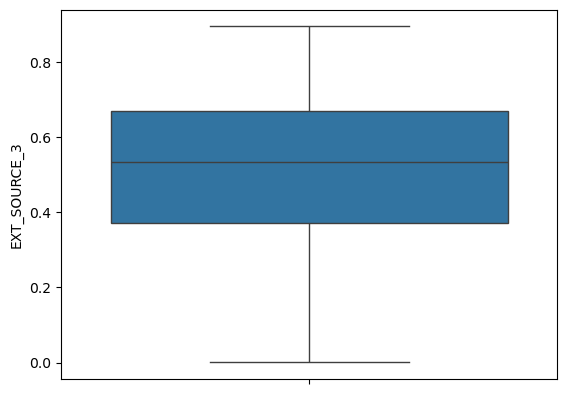

In [611]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

We can impute with mean or median Since it dosn't have numerical outliners with no diiference between mean and median

In [612]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(),inplace=True )

In [613]:
app_df.EXT_SOURCE_3.isnull().mean()*100

np.float64(0.0)

In [614]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.535276    20.080908
0.746300     0.474780
0.713631     0.427627
0.694093     0.414945
0.670652     0.387303
              ...    
0.018924     0.000325
0.029079     0.000325
0.018137     0.000325
0.020026     0.000325
0.043227     0.000325
Name: proportion, Length: 814, dtype: float64

In [615]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

16

In [616]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [617]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    99.388703
1.0     0.586484
2.0     0.021053
3.0     0.003384
4.0     0.000376
Name: proportion, dtype: float64

In [618]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.440209
1.0     0.485729
2.0     0.039851
3.0     0.016918
4.0     0.009775
5.0     0.003384
6.0     0.003008
9.0     0.000752
8.0     0.000376
Name: proportion, dtype: float64

HERE MOST OF THE VALUES IS ZERO.

In [619]:
cols={"AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON",
      "AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"}

In [620]:
for cols in cols:
    app_df[cols].fillna(app_df[cols].mode()[0],inplace=True)

In [621]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [622]:
null_cols=list(app_df.columns[app_df.isna().any()])
len(null_cols)

10

In [623]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100

NAME_TYPE_SUITE
Unaccompanied      81.159562
Family             13.111205
Spouse, partner     3.713029
Children            1.066884
Other_B             0.578018
Other_A             0.282804
Group of people     0.088499
Name: proportion, dtype: float64

In [624]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100

EXT_SOURCE_2
0.285898    0.234967
0.262258    0.135897
0.265256    0.111781
0.159679    0.104937
0.265312    0.099723
              ...   
0.030889    0.000326
0.002780    0.000326
0.774265    0.000326
0.328115    0.000326
0.046691    0.000326
Name: proportion, Length: 119831, dtype: float64

In [625]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100

OBS_30_CNT_SOCIAL_CIRCLE
0.0      53.479722
1.0      15.916669
2.0       9.725603
3.0       6.630559
4.0       4.614506
5.0       3.116904
6.0       2.105452
7.0       1.432347
8.0       0.968058
9.0       0.653529
10.0      0.448954
11.0      0.277986
12.0      0.212731
13.0      0.134099
14.0      0.084179
15.0      0.054162
16.0      0.043395
17.0      0.028712
18.0      0.015009
19.0      0.014356
20.0      0.009788
21.0      0.009462
22.0      0.007178
23.0      0.004894
25.0      0.003589
24.0      0.003589
27.0      0.001631
26.0      0.000979
30.0      0.000653
29.0      0.000326
28.0      0.000326
47.0      0.000326
348.0     0.000326
Name: proportion, dtype: float64

categorical value->imput missing values with mode


numerical value->impute missing value with median

In [626]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0],inplace=True)

In [627]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0],inplace=True)

In [628]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [629]:
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace=True)
app_df.AMT_GOODS_PRICE.fillna(app_df.AMT_GOODS_PRICE.median(), inplace=True)
app_df.AMT_ANNUITY.fillna(app_df.AMT_ANNUITY.median(), inplace=True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace=True)
app_df.DAYS_LAST_PHONE_CHANGE.fillna(app_df.DAYS_LAST_PHONE_CHANGE.median(), inplace=True)

In [630]:
null_cols=list(app_df.columns[app_df.isnull().any()])
len(null_cols)

0

In [631]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

In [632]:
app_df.DAYS_BIRTH=app_df.DAYS_BIRTH.apply(lambda x: abs(x))
app_df.DAYS_EMPLOYED=app_df.DAYS_EMPLOYED.apply(lambda x: abs(x))
app_df.DAYS_ID_PUBLISH=app_df.DAYS_ID_PUBLISH.apply(lambda x: abs(x))
app_df.DAYS_LAST_PHONE_CHANGE=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x: abs(x))
app_df.DAYS_REGISTRATION=app_df.DAYS_REGISTRATION.apply(lambda x:abs(x))

In [633]:
app_df["YEARS_BIRTH"]=app_df.DAYS_BIRTH.apply(lambda x:int(x//365))
app_df["YEARS_EMPLOYED"]=app_df.DAYS_EMPLOYED.apply(lambda x:int(x//365))
app_df["YEARS_REGISTRATION"]=app_df.DAYS_REGISTRATION.apply(lambda x:int(x//365))
app_df["YEARS_ID_PUBLISH"]=app_df.DAYS_ID_PUBLISH.apply(lambda x:int(x//365))
app_df["YEARS_LAST_PHONE_CHANGE"]=app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x:int(x//365))  

In [634]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
450000.0     3.157285
675000.0     2.886726
225000.0     2.654214
180000.0     2.387557
270000.0     2.354713
               ...   
314968.5     0.000325
2339100.0    0.000325
507964.5     0.000325
1438906.5    0.000325
1326303.0    0.000325
Name: proportion, Length: 5603, dtype: float64

In [635]:
app_df.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [636]:
app_df["AMT_CREDIT_CATEGORY"]=pd.cut(app_df.AMT_CREDIT,[0,20000,40000,60000,80000,1000000],
                                    labels=["Very low credit","low credit","medium credit","high credit","very high credit"])

In [637]:
app_df.AMT_CREDIT_CATEGORY.value_counts(normalize=True)*100

AMT_CREDIT_CATEGORY
very high credit    98.680910
high credit          0.755264
medium credit        0.563827
Very low credit      0.000000
low credit           0.000000
Name: proportion, dtype: float64

In [638]:
app_df["AMT_CREDIT_CATEGORY"].value_counts(normalize=True).plot.bar()
plt.show()

In [639]:
app_df["AGE_Category"]=pd.cut(app_df.YEARS_BIRTH,[0,20,30,40,50,60,70,80,90],
                              labels=["below 20","20-30","30-40","40-50","50-60","60-70","70-80","80-90"])

In [640]:
app_df.AGE_Category.value_counts(normalize=True)*100

AGE_Category
30-40       27.028952
40-50       24.194582
50-60       22.054170
20-30       17.171743
60-70        9.550227
below 20     0.000325
70-80        0.000000
80-90        0.000000
Name: proportion, dtype: float64

In [641]:
app_df["AGE_Category"].value_counts(normalize=True).plot.pie(autopct="%1.1f%%")
plt.show()

most application are from 30-40

In [642]:
app_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [643]:
tar_0=app_df[app_df.TARGET==0]
tar_1=app_df[app_df.TARGET==1]
app_df.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [644]:
cat_cols=list(app_df.columns[app_df.dtypes==object])
num_cols=list(app_df.columns[app_df.dtypes==np.int64])+list(app_df.columns[app_df.dtypes==np.float64])

In [645]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [646]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


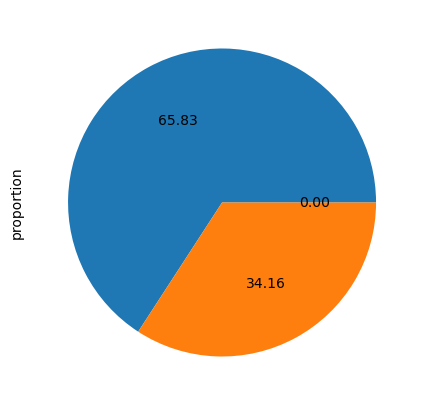

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


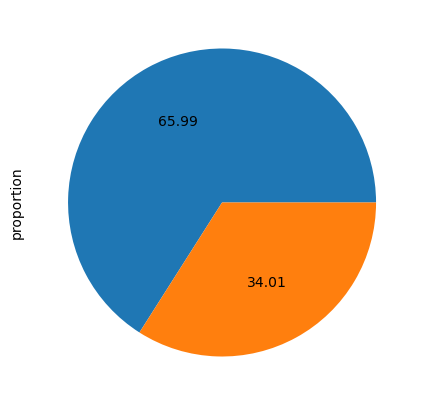

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


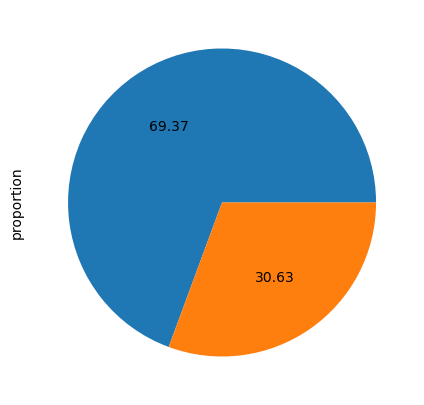

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


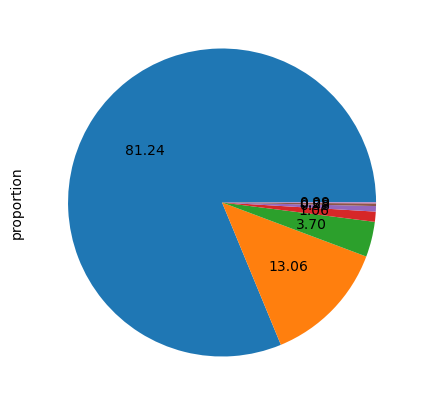

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


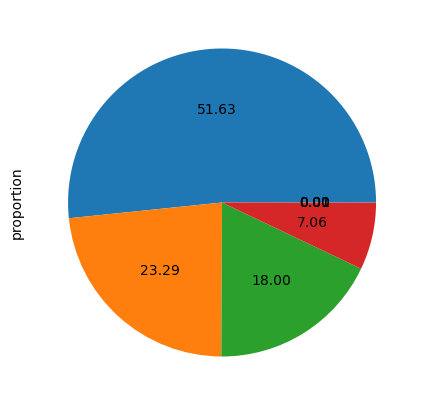

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


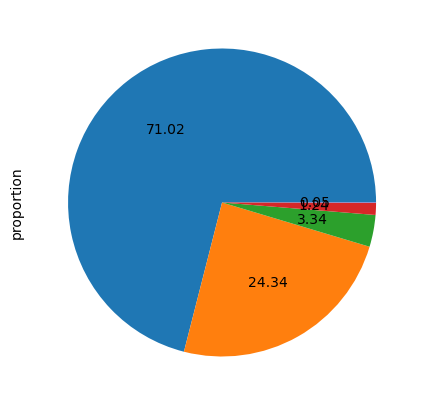

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


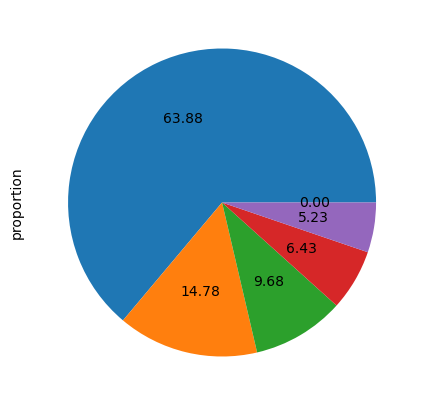

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


OCCUPATION_TYPE
others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


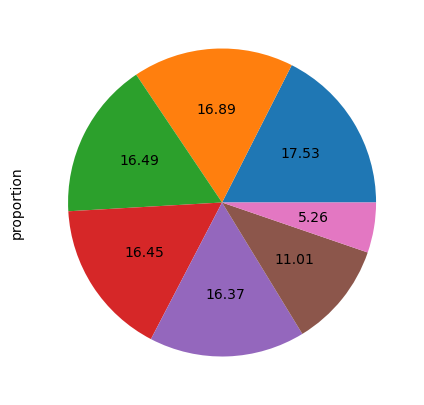

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

In [647]:
for cols in cat_cols:
    print(app_df[cols].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    app_df[cols].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f')
    plt.show()

. Conclusion >> Insights on below columns
1.Loan Type (NAME_CONTRACT_TYPE): Most students took Cash loans rather than Revolving loans.

2.Gender (CODE_GENDER): There are about twice as many female applicants compared to males.

3.Car Ownership (FLAG_OWN_CAR): Around 70% don’t own a car.

4.House Ownership (FLAG_OWN_REALTY): Similarly, about 70% don’t own a house.

5.Companion (NAME_TYPE_SUITE): Most students (81%) applied alone (Unaccompanied).

6.Income Source (NAME_INCOME_TYPE): More than half (51%) earn their income from Work.

7.Education (NAME_EDUCATION_TYPE): The majority (71%) have completed Secondary education.

8.Family Status (NAME_FAMILY_STATUS): About 63% are married.

9.Housing (NAME_HOUSING_TYPE): Almost everyone (88%) lives in a house or apartment.

10.Occupation (OCCUPATION_TYPE): The largest chunk (31%) fall into “Other” jobs.

11.Application Day (WEEKDAY_APPR_PROCESS_START): Most loan applications were made on Tuesday.

12.Organization Type (ORGANIZATION_TYPE): The most common workplace is Business Entity Type 3.

In [648]:
num_cols_without_flags=[]
num_cols_withflags=[]
for cols in num_cols:
    if cols.startswith("FLAG"):
        num_cols_withflags.append(cols)
    else:
        num_cols_without_flags.append(cols)

In [649]:
num_cols_withflags

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [650]:
num_cols_without_flags

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


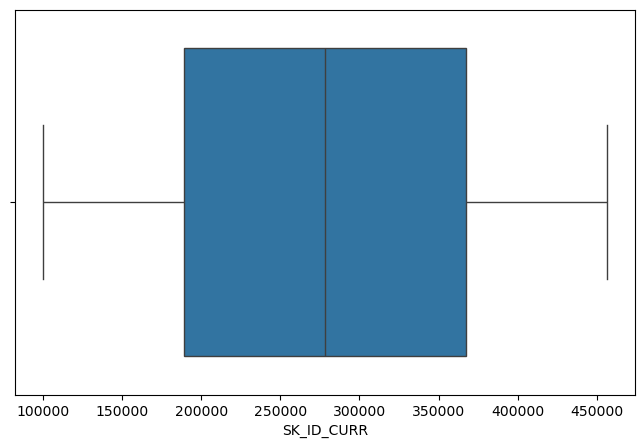

---------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


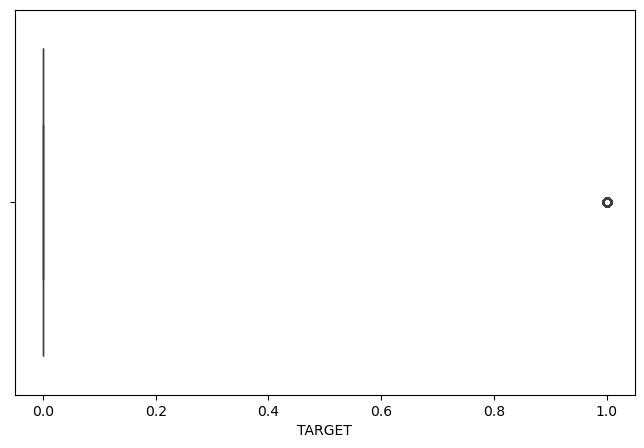

---------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


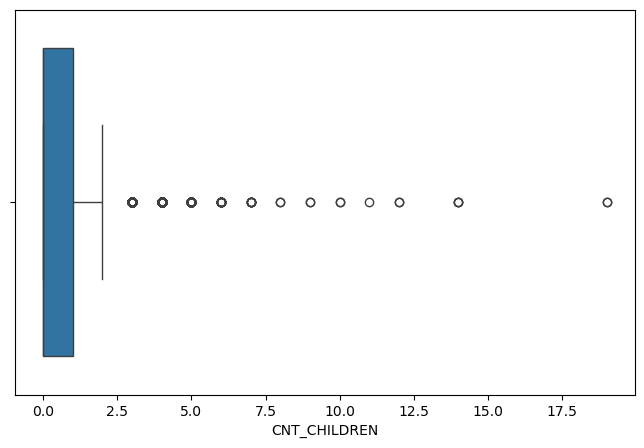

---------------
count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64


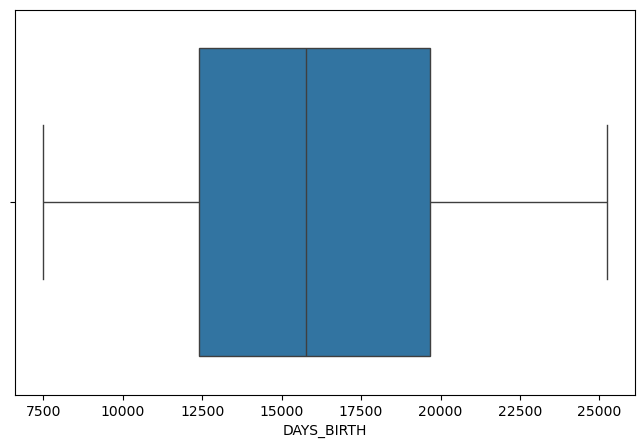

---------------
count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


---------------
count    307511.000000
mean       2994.202373
std        1509.450419
min           0.000000
25%        1720.000000
50%        3254.000000
75%        4299.000000
max        7197.000000
Name: DAYS_ID_PUBLISH, dtype: float64


---------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


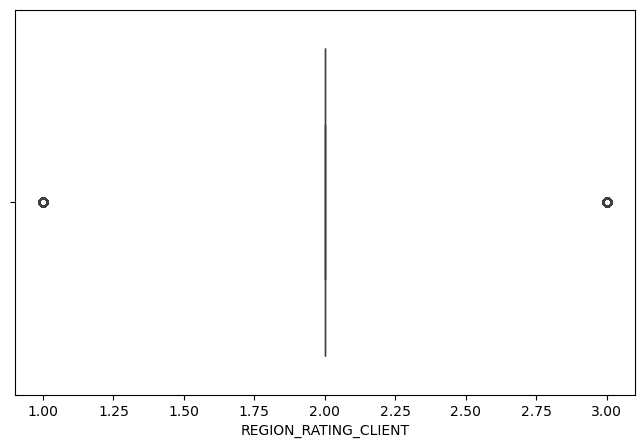

---------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


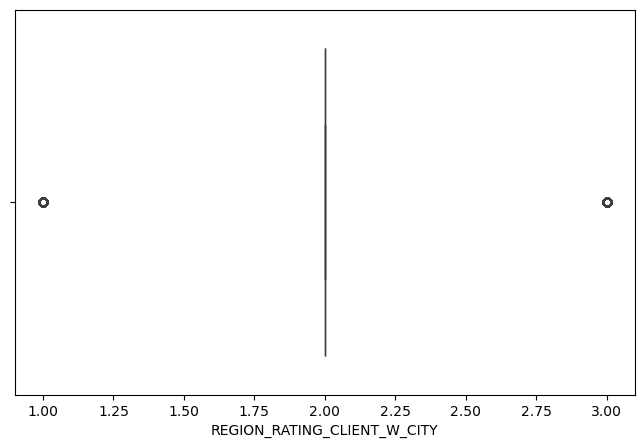

---------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


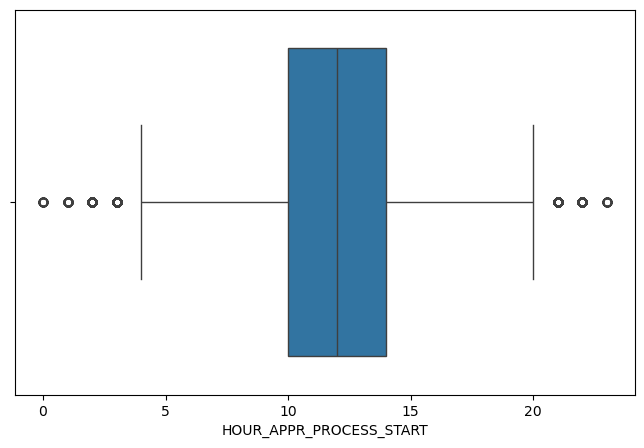

---------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


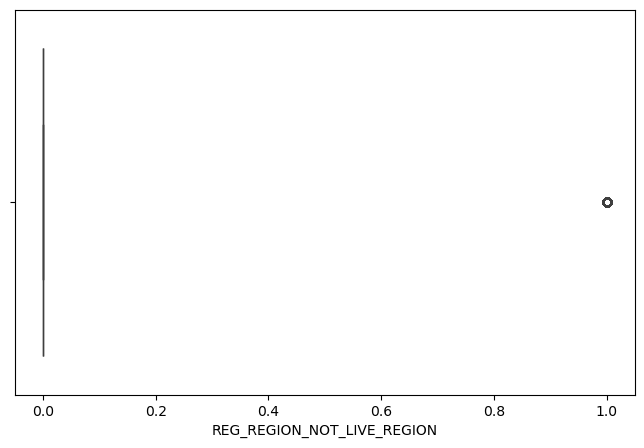

---------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


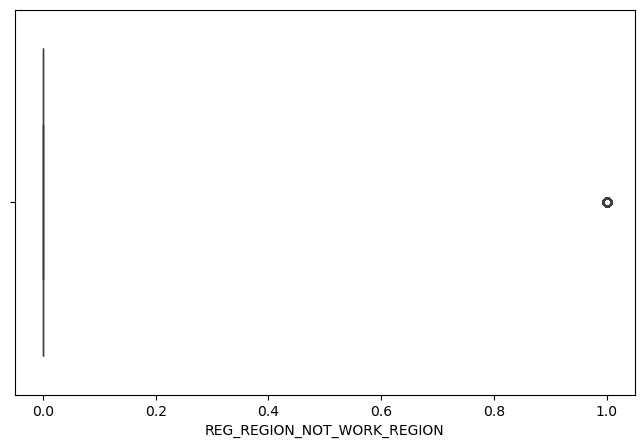

---------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


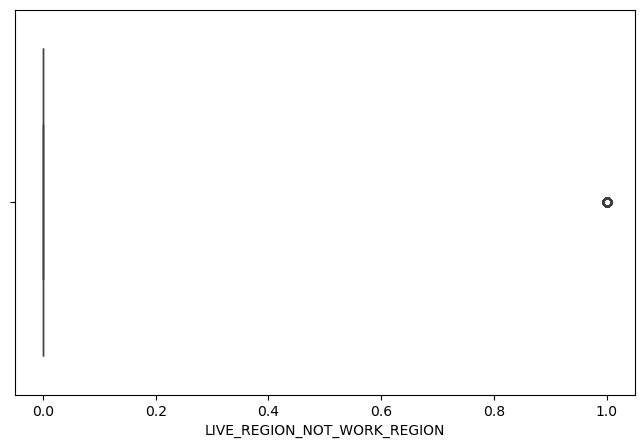

---------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


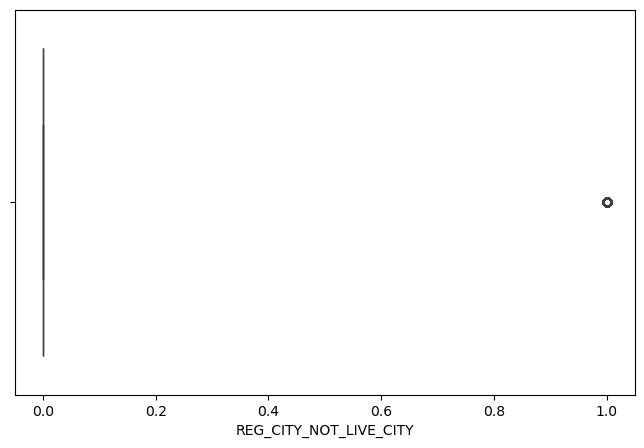

---------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


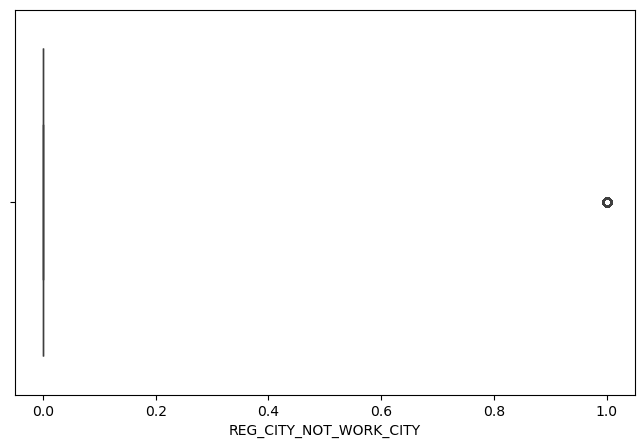

---------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


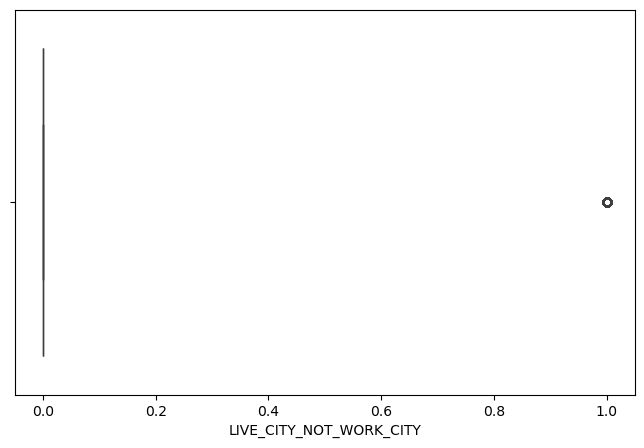

---------------
count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: YEARS_BIRTH, dtype: float64


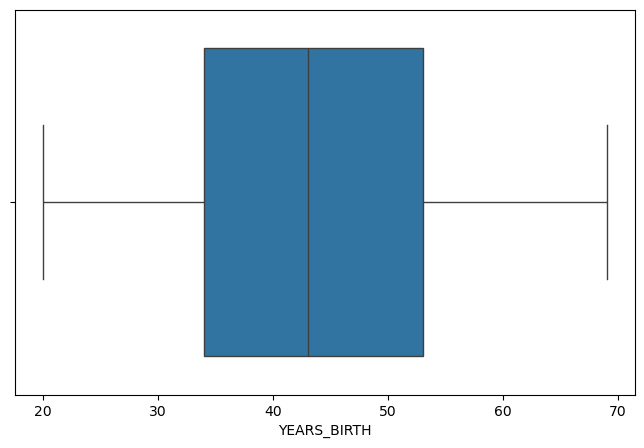

---------------
count    307511.000000
mean        185.021521
std         381.972190
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


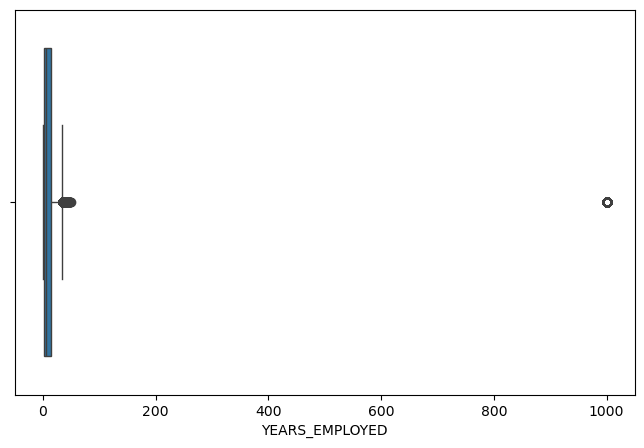

---------------
count    307511.000000
mean         13.168683
std           9.646841
min           0.000000
25%           5.000000
50%          12.000000
75%          20.000000
max          67.000000
Name: YEARS_REGISTRATION, dtype: float64


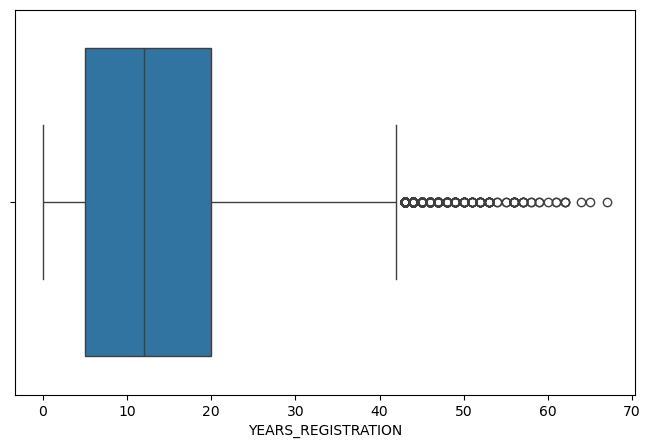

---------------
count    307511.000000
mean          7.713474
std           4.134515
min           0.000000
25%           4.000000
50%           8.000000
75%          11.000000
max          19.000000
Name: YEARS_ID_PUBLISH, dtype: float64


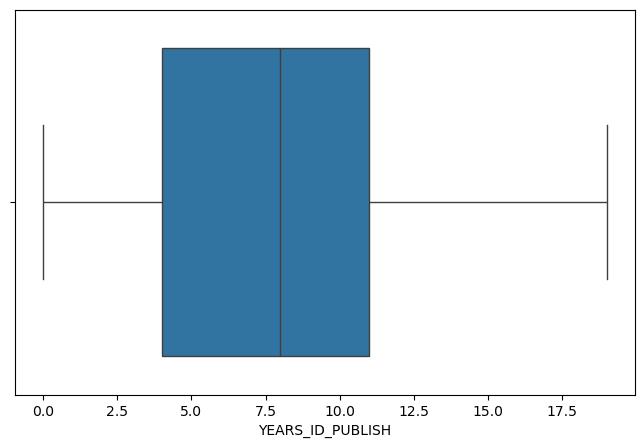

---------------
count    307511.000000
mean          2.225114
std           2.193674
min           0.000000
25%           0.000000
50%           2.000000
75%           4.000000
max          11.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


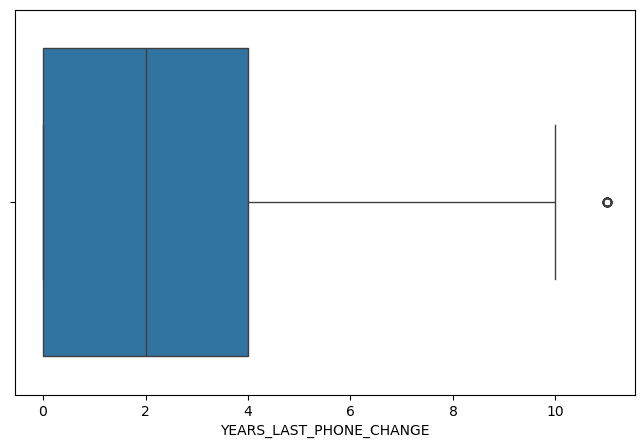

---------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


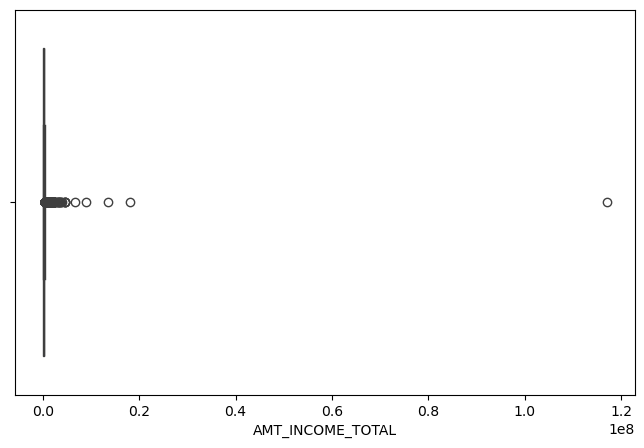

---------------
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64


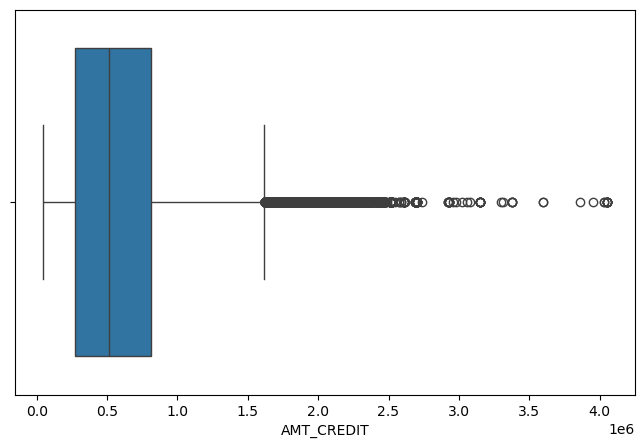

---------------
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


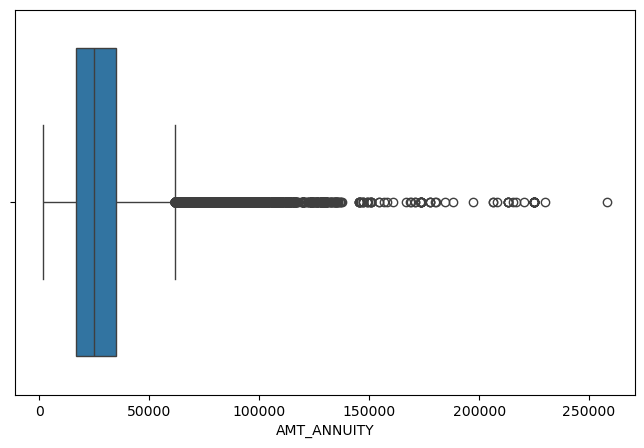

---------------
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64


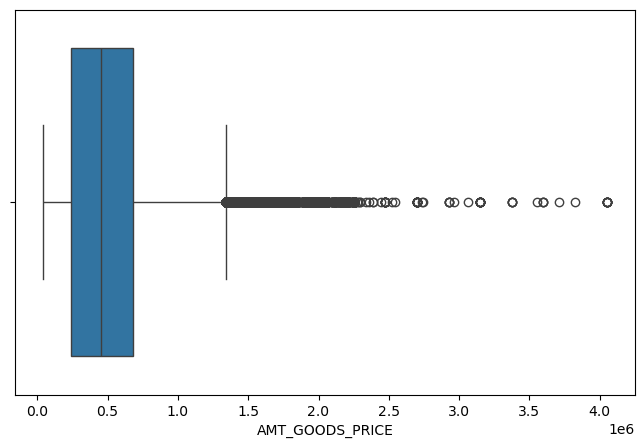

---------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


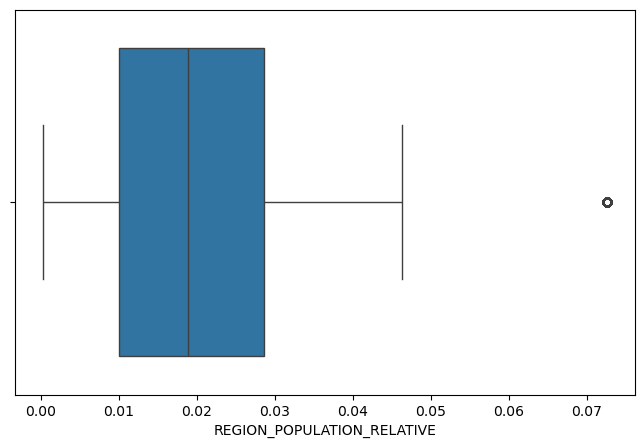

---------------
count    307511.000000
mean       4986.120328
std        3522.886321
min           0.000000
25%        2010.000000
50%        4504.000000
75%        7479.500000
max       24672.000000
Name: DAYS_REGISTRATION, dtype: float64


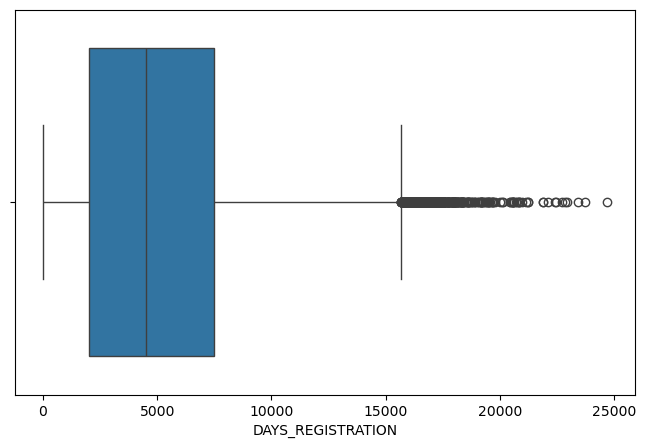

---------------
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


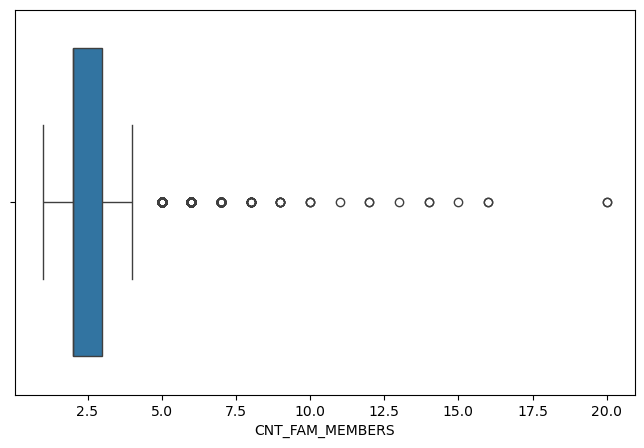

---------------
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64


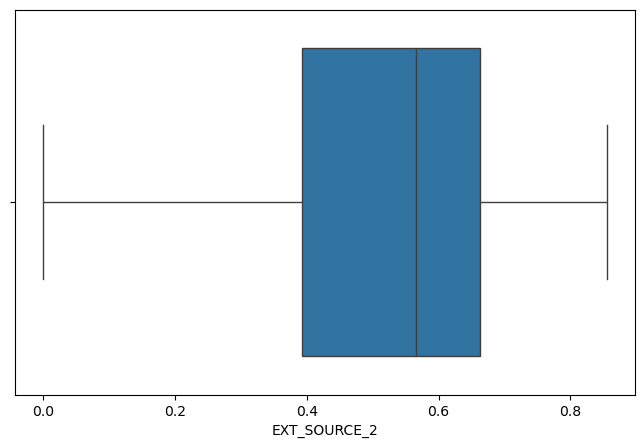

---------------
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64


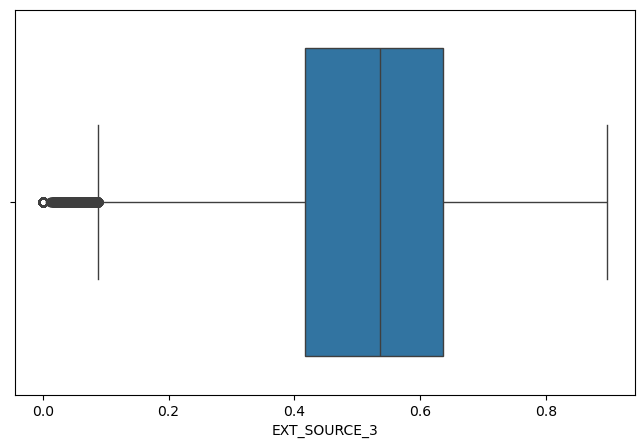

---------------
count    307511.000000
mean          1.417523
std           2.398395
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


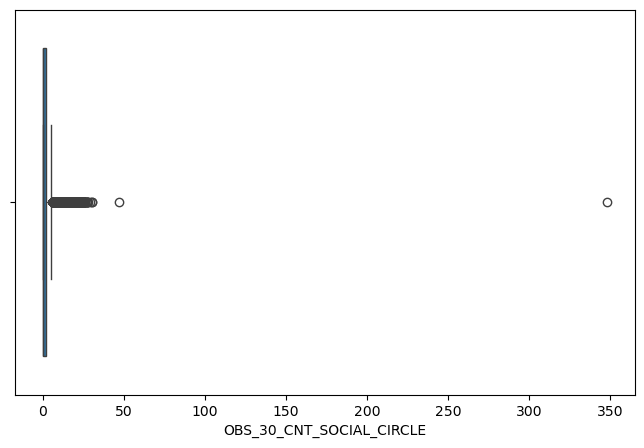

---------------
count    307511.000000
mean          0.142944
std           0.446033
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


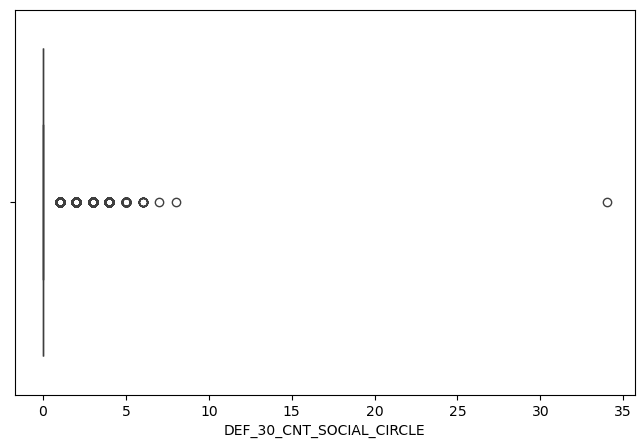

---------------
count    307511.000000
mean          1.400626
std           2.377224
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


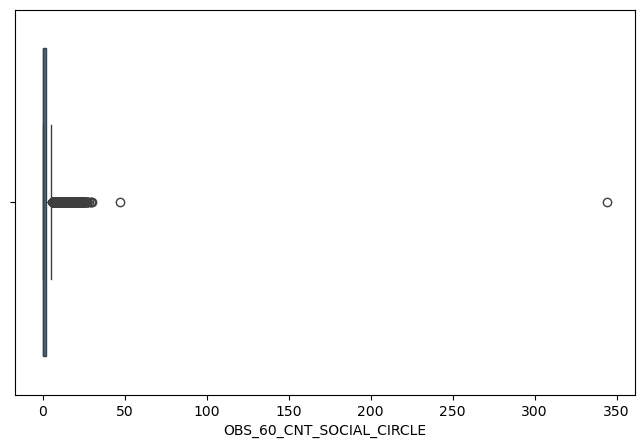

---------------
count    307511.000000
mean          0.099717
std           0.361735
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


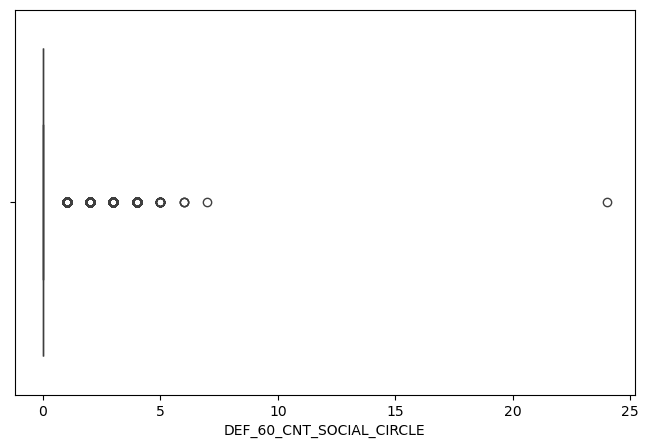

---------------
count    307511.000000
mean        962.858119
std         826.807226
min           0.000000
25%         274.000000
50%         757.000000
75%        1570.000000
max        4292.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


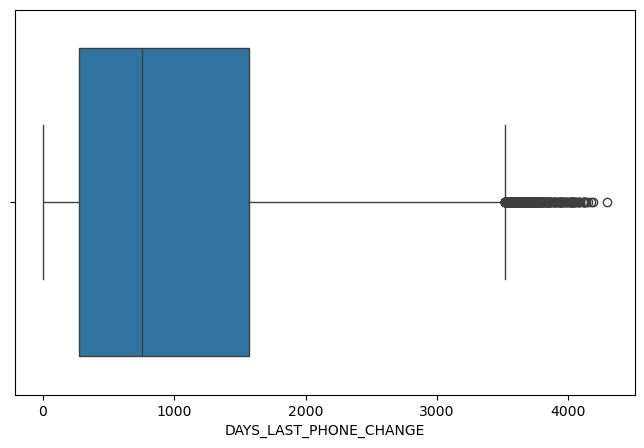

---------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


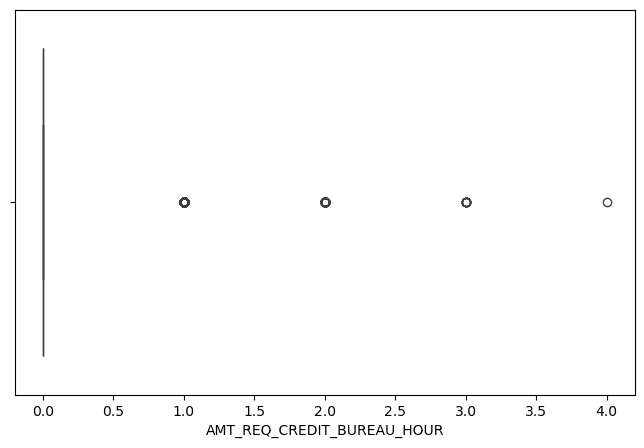

---------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


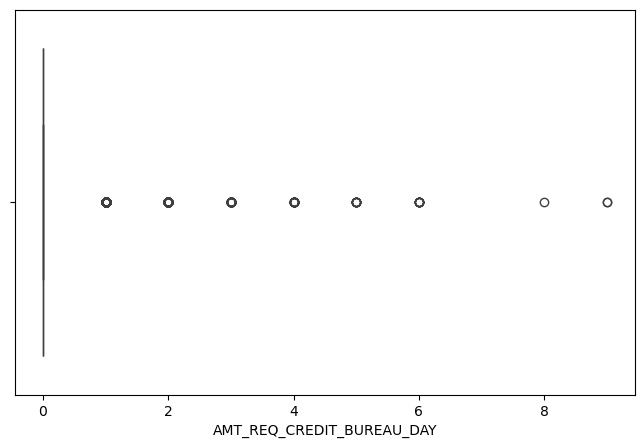

---------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


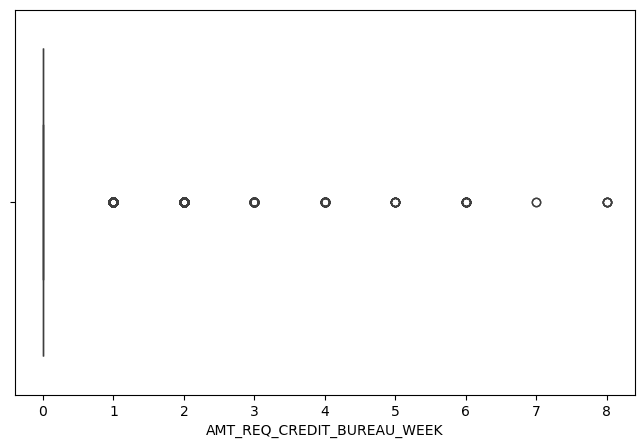

---------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


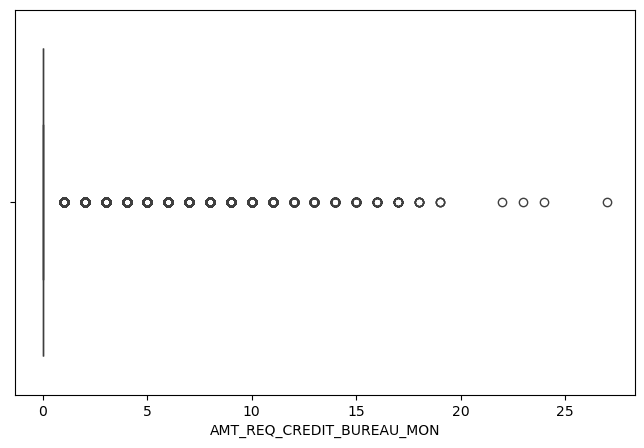

---------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


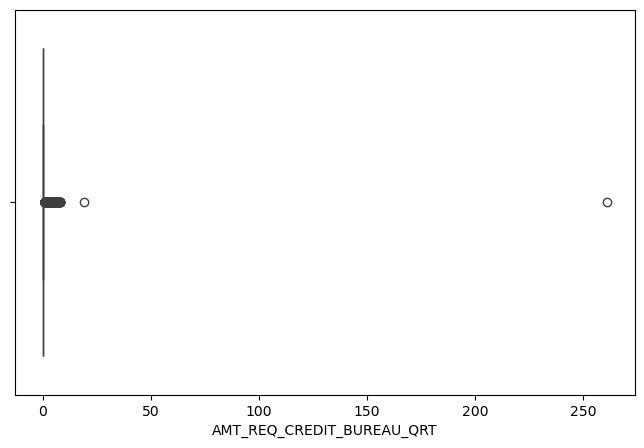

---------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


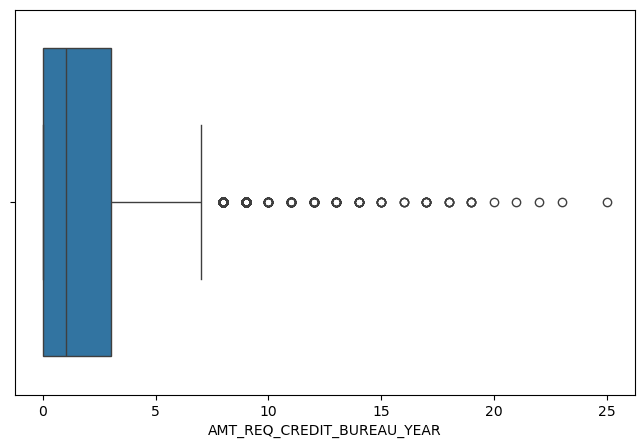

---------------


In [651]:
for col in num_cols_without_flags:
    print(app_df[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=app_df, x=col)
    plt.show()
    print("---------------")

1.AMT_INCOME_TOTAL – Contains some outliers. There’s a big gap between the 99th percentile and the max value, and the mean is much higher than the median, showing outlier influence.

2.AMT_CREDIT – Also has outliers. A large difference between the 99th percentile and the maximum can be seen, with a clear shift in mean vs median due to extreme values.

3.AMT_ANNUITY – Shows outliers as well. The mean and median are quite different, and again, the 99th percentile is far lower than the max value.

4.AMT_GOODS_PRICE – Similar to above, this column has noticeable outliers, causing a big gap between the 99th percentile and max, and a significant difference between mean and median.

5.REGION_POPULATION_RELATIVE – Has a single outlier, but overall the mean and median are close, so the impact isn’t very strong.

Plot on NAME_CONTRACT_TYPE for Target 0 and 1


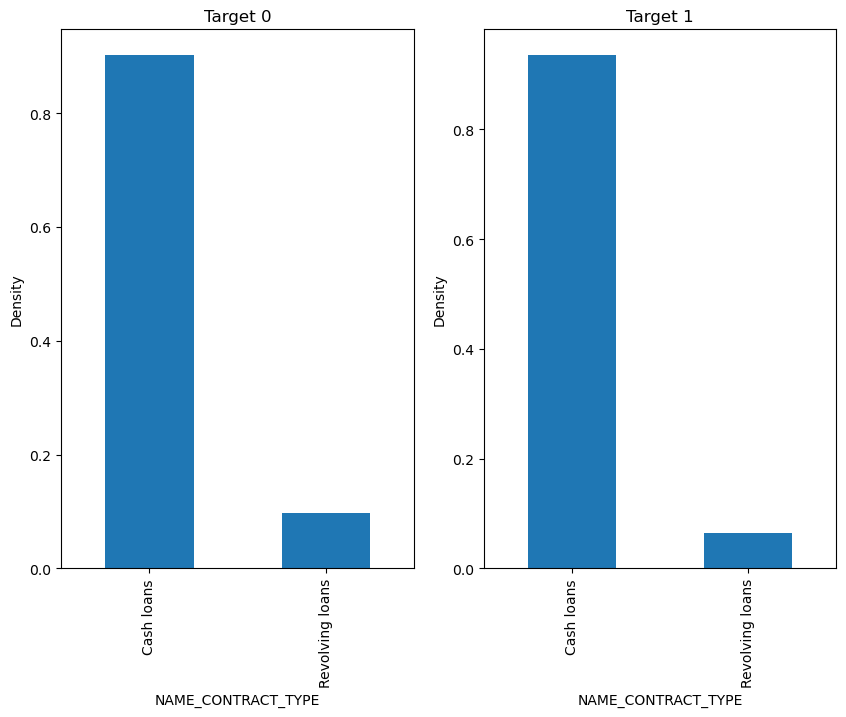



----------------------------


Plot on CODE_GENDER for Target 0 and 1


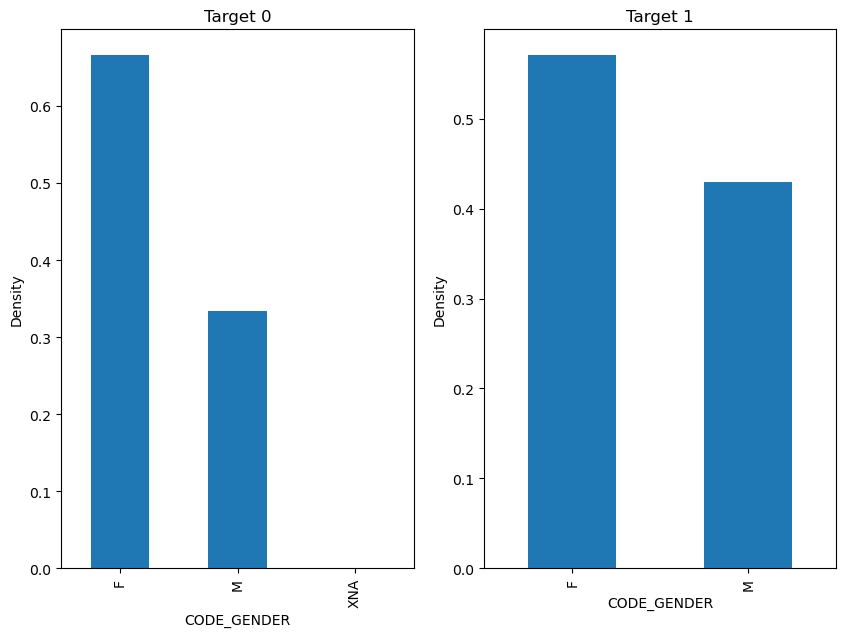



----------------------------


Plot on FLAG_OWN_CAR for Target 0 and 1


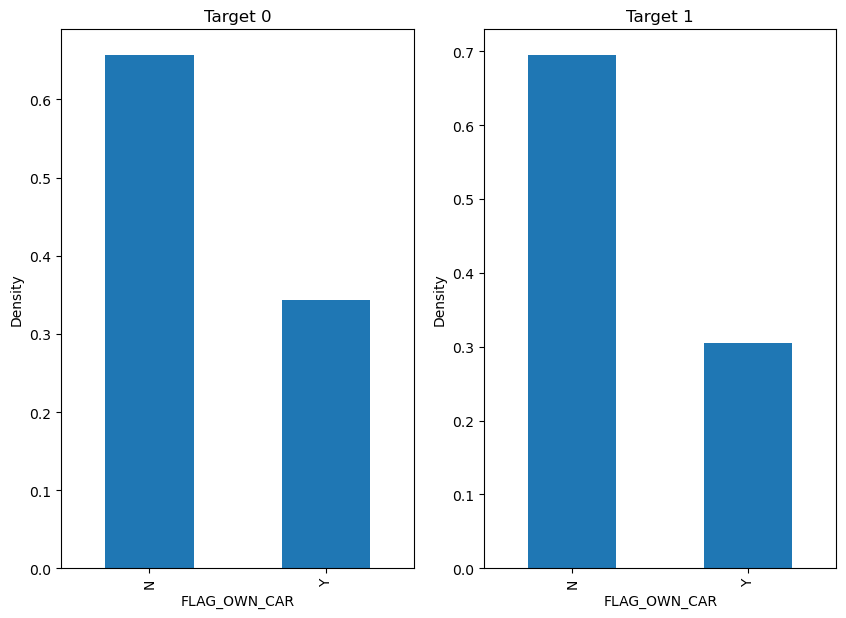



----------------------------


Plot on FLAG_OWN_REALTY for Target 0 and 1


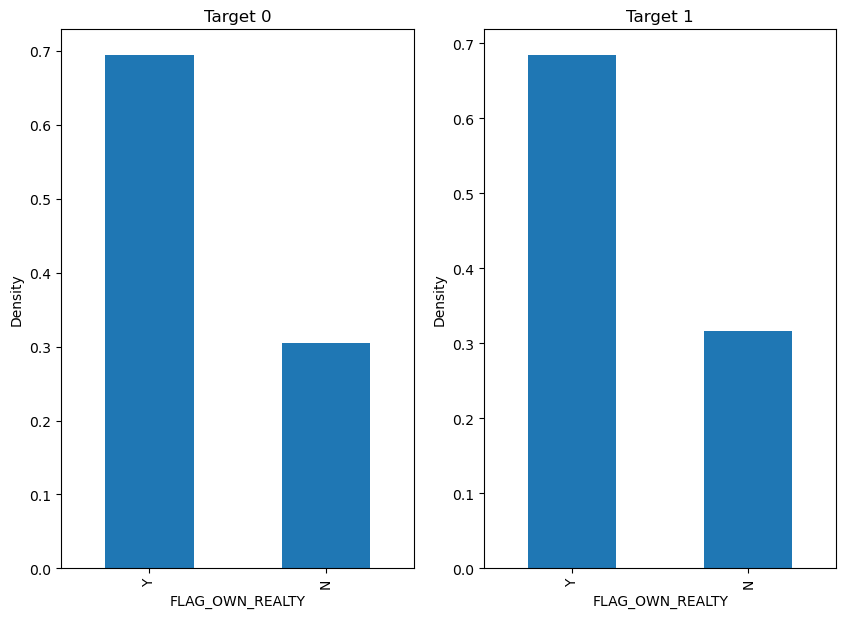



----------------------------


Plot on NAME_TYPE_SUITE for Target 0 and 1


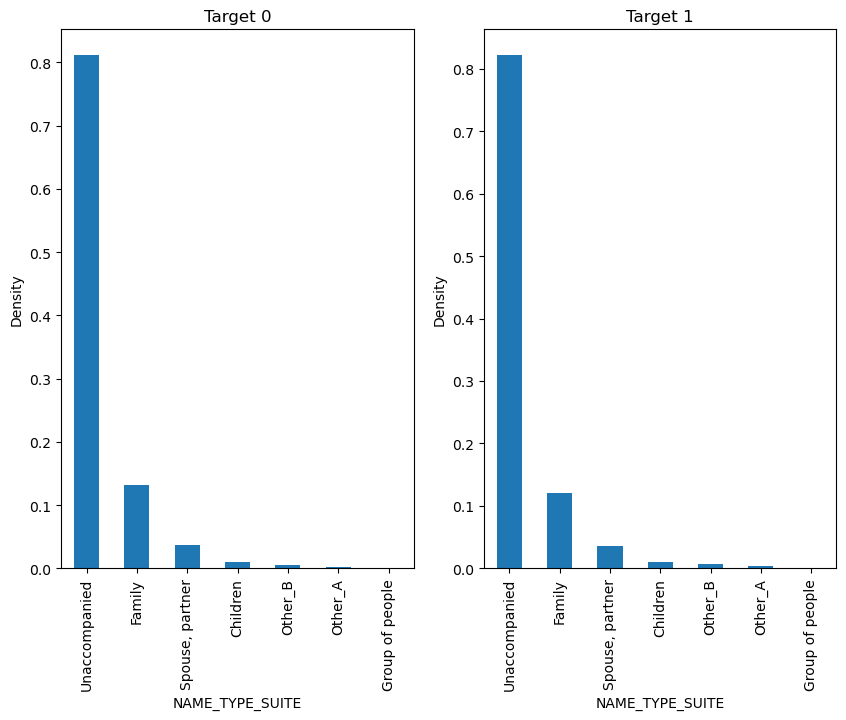



----------------------------


Plot on NAME_INCOME_TYPE for Target 0 and 1


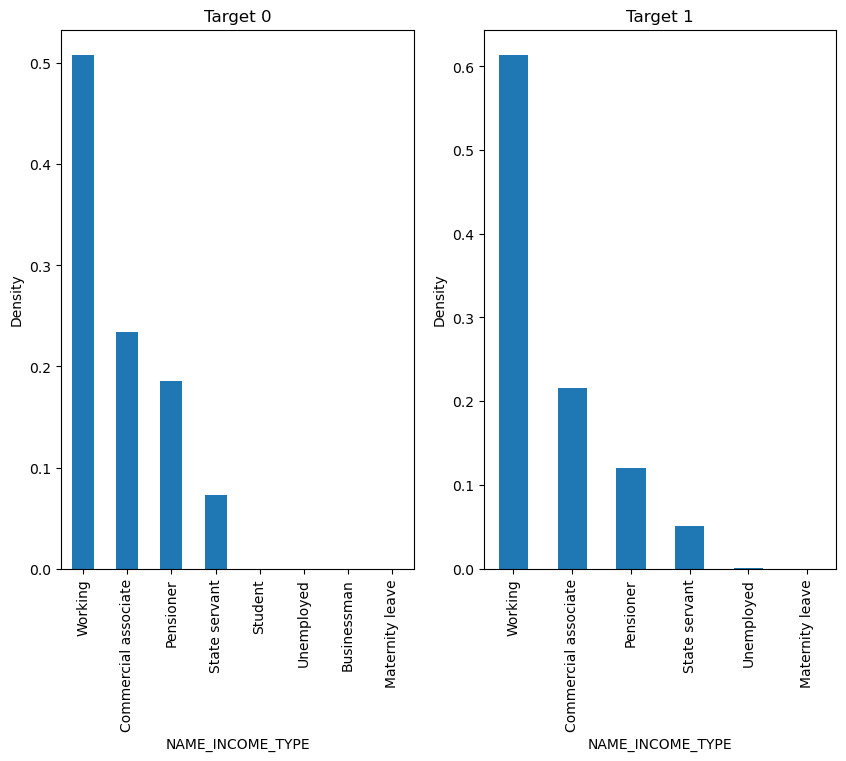



----------------------------


Plot on NAME_EDUCATION_TYPE for Target 0 and 1


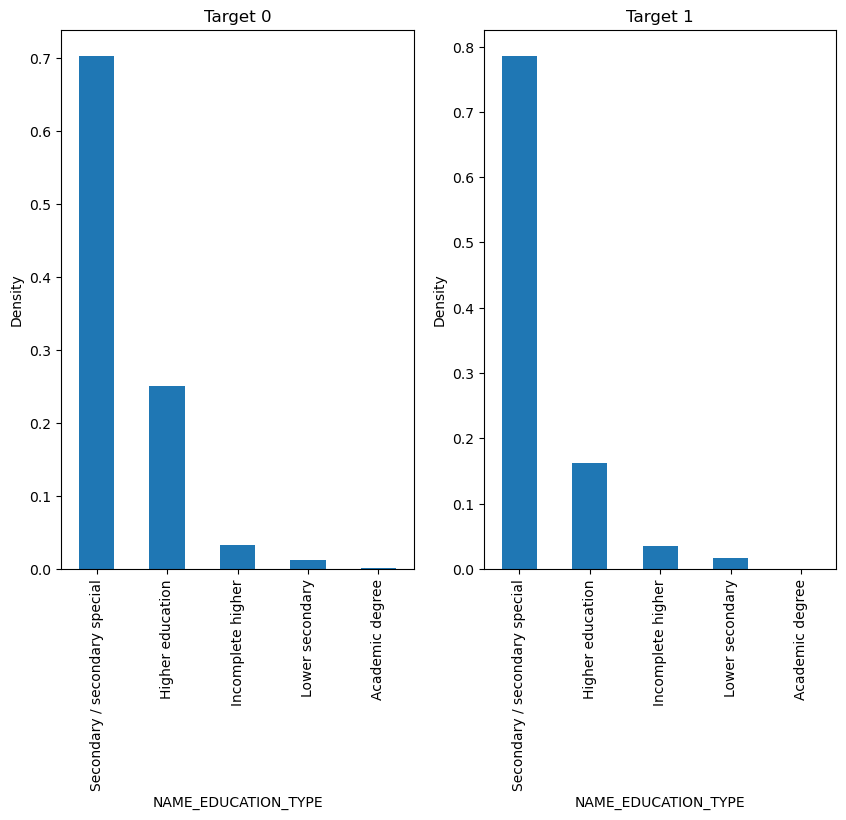



----------------------------


Plot on NAME_FAMILY_STATUS for Target 0 and 1


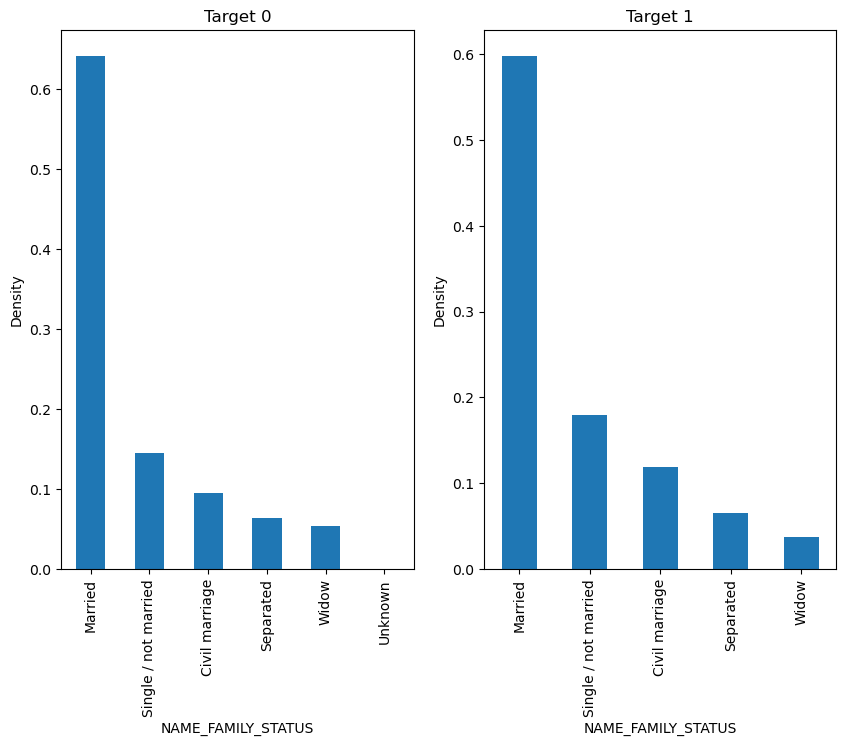



----------------------------


Plot on NAME_HOUSING_TYPE for Target 0 and 1


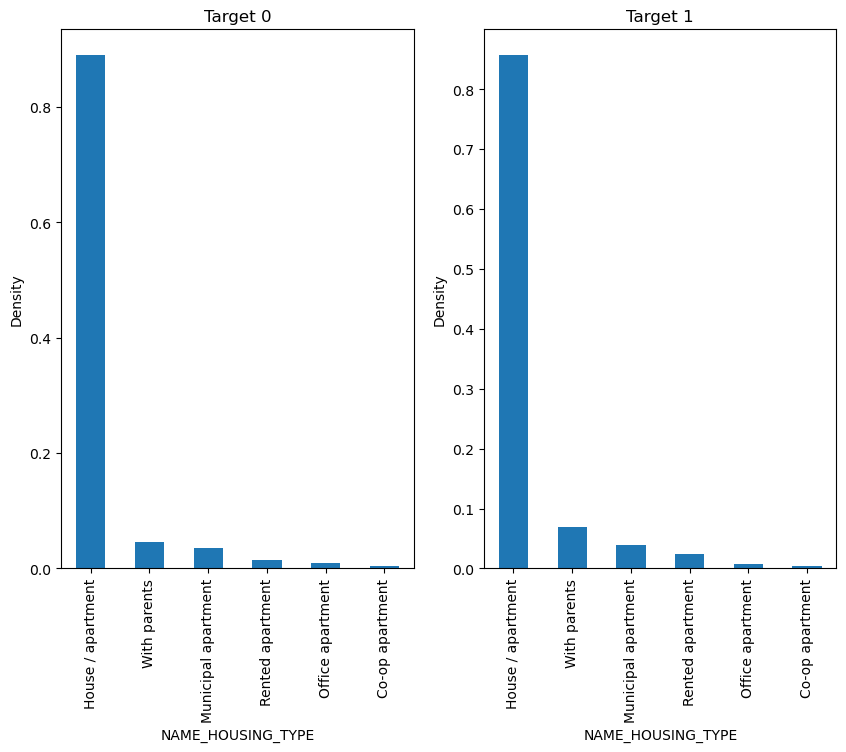



----------------------------


Plot on OCCUPATION_TYPE for Target 0 and 1


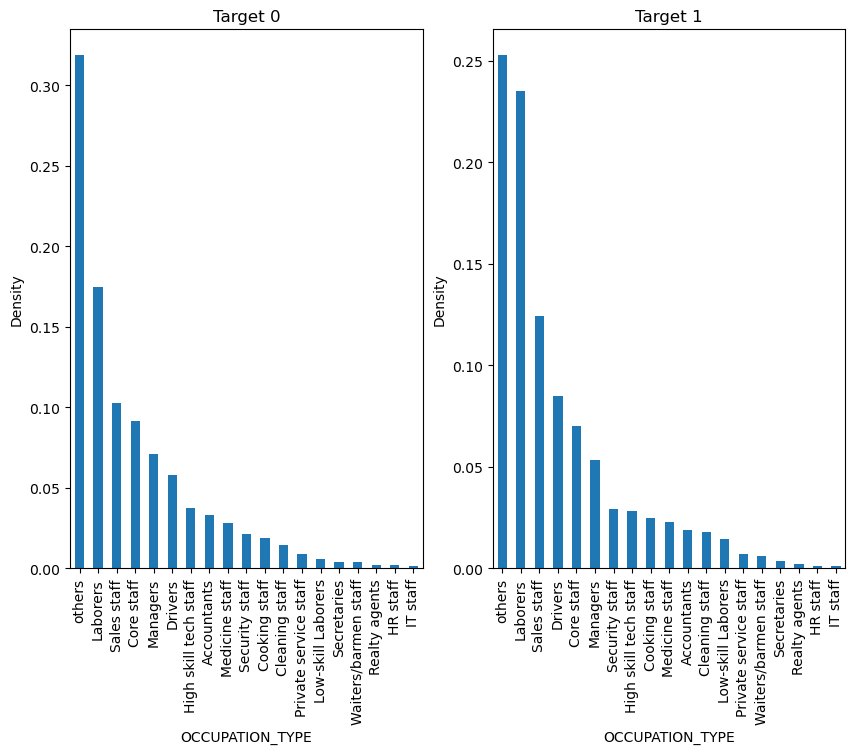



----------------------------


Plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


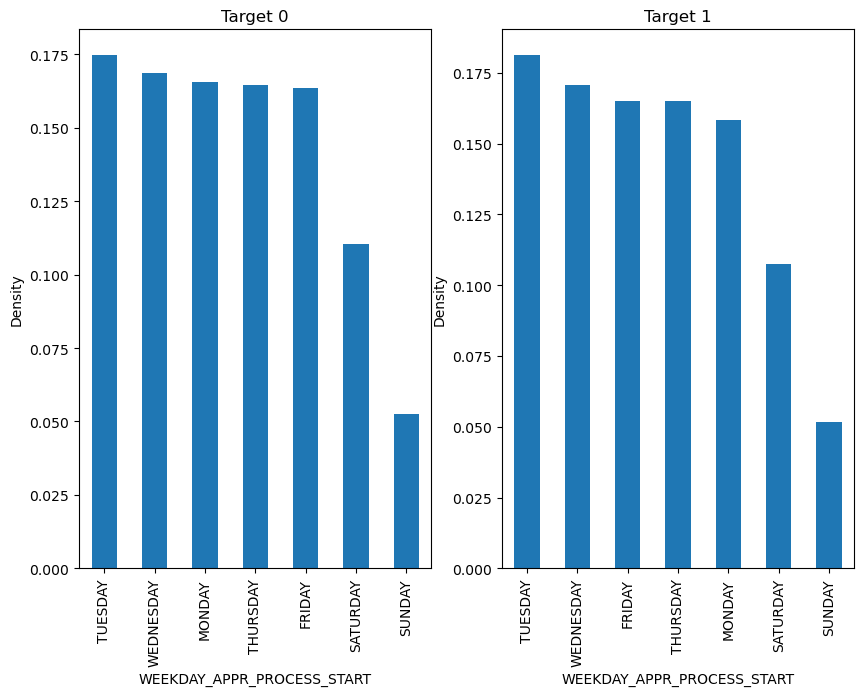



----------------------------


Plot on ORGANIZATION_TYPE for Target 0 and 1


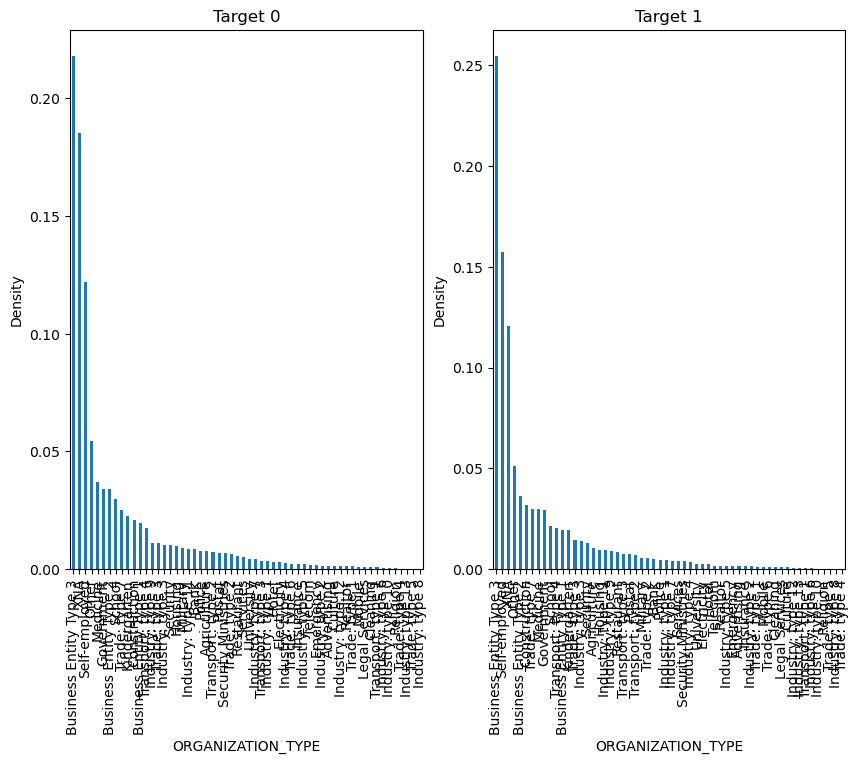



----------------------------




In [652]:
for col in cat_cols:
    print(f"Plot on {col} for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n----------------------------\n\n")

1.NAME_CONTRACT_TYPE – Most applicants received Cash loans compared to Revolving loans, for both Target 0 (non-defaulters) and Target 1 (defaulters).

2.CODE_GENDER – The number of female applicants is about twice the number of male applicants, in both Target groups.

3.FLAG_OWN_CAR – Around 70% of applicants do not own a car, for both Target 0 and 1.

4.FLAG_OWN_REALTY – Similarly, about 70% do not own real estate/property, across both targets.

5.NAME_TYPE_SUITE – A majority (81%) of applicants applied alone (Unaccompanied) in both groups.

6.NAME_INCOME_TYPE – For both targets, more than half (51%) earn their income through regular work.

7.NAME_EDUCATION_TYPE – Nearly 71% have completed Secondary / Secondary Special education, regardless of target.

8.NAME_FAMILY_STATUS – About 63% of applicants are married, both for Target 0 and Target 1.

9.NAME_HOUSING_TYPE – Most applicants (88%) live in a house or apartment, across both groups.

10.OCCUPATION_TYPE – The largest share (31%) of applicants are in the “Other” occupation category.

11.Non-defaulters (Target 0): Mainly in “Other” jobs.

12.Defaulters (Target 1): Many are Laborers, Sales staff, Drivers, and Core staff, who face repayment issues.

13.WEEKDAY_APPR_PROCESS_START – Loan applications are most often made on Tuesday and least on Sunday.

14.ORGANIZATION_TYPE – The most common employer categories are Business Entity Type 3, Self-Employed, and Other organization types.

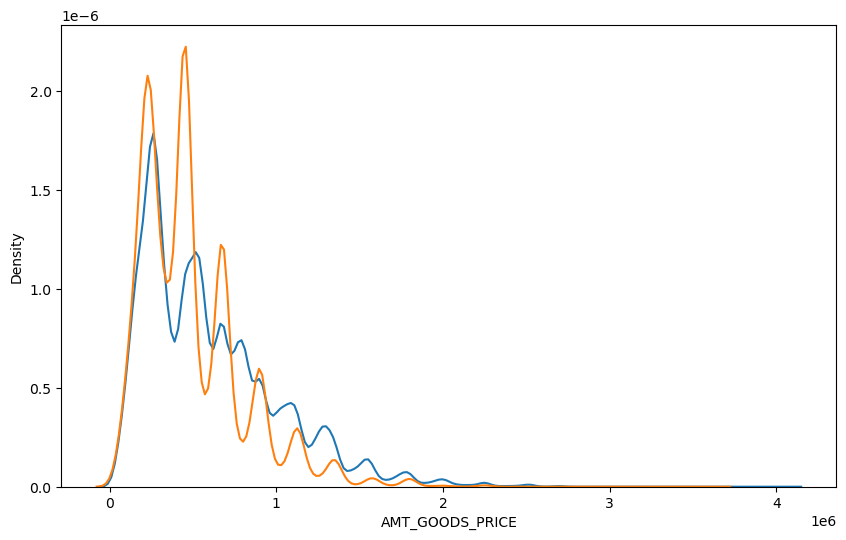

In [653]:
plt.figure(figsize=(10,6))
sns.distplot(tar_0["AMT_CREDIT"],label='tar_0',hist=False)
sns.distplot(tar_1["AMT_GOODS_PRICE"],label='tar_1',hist=False)
plt.show()

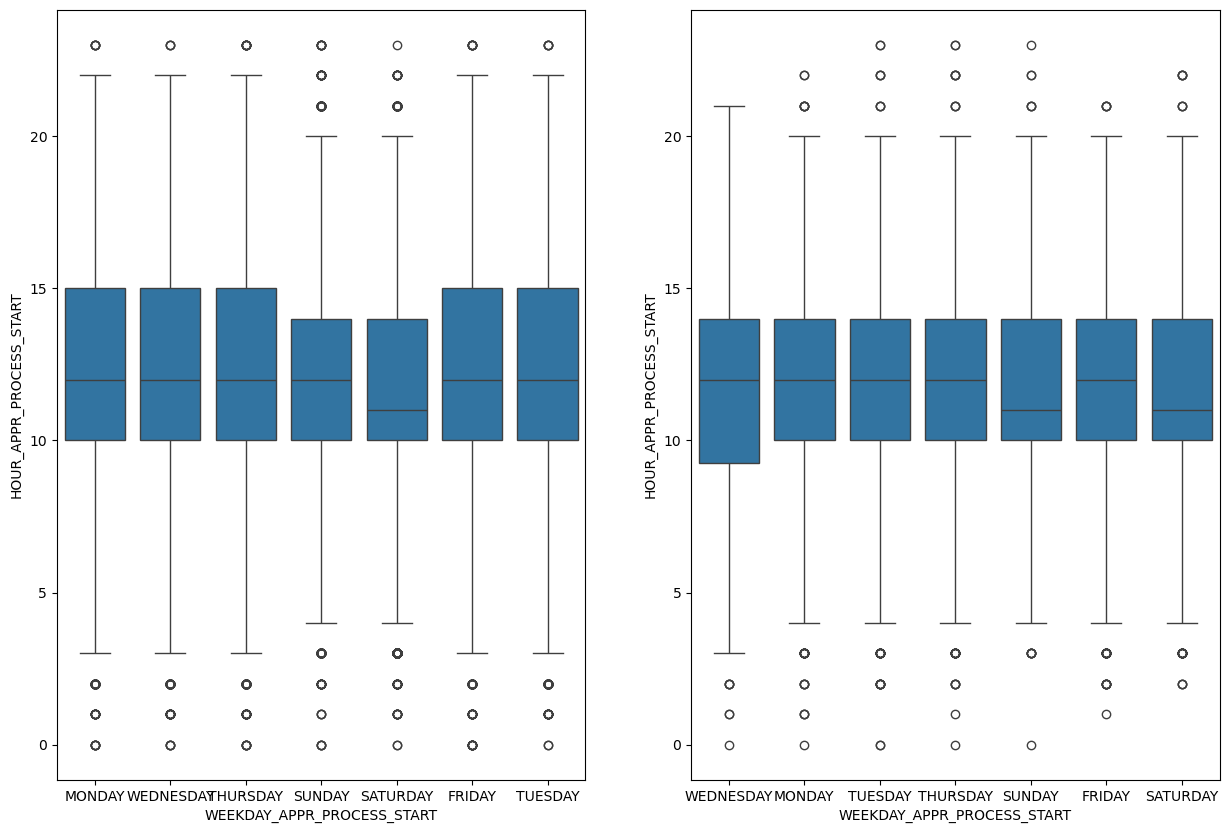

In [654]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START", data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START", data=tar_1)
plt.show()

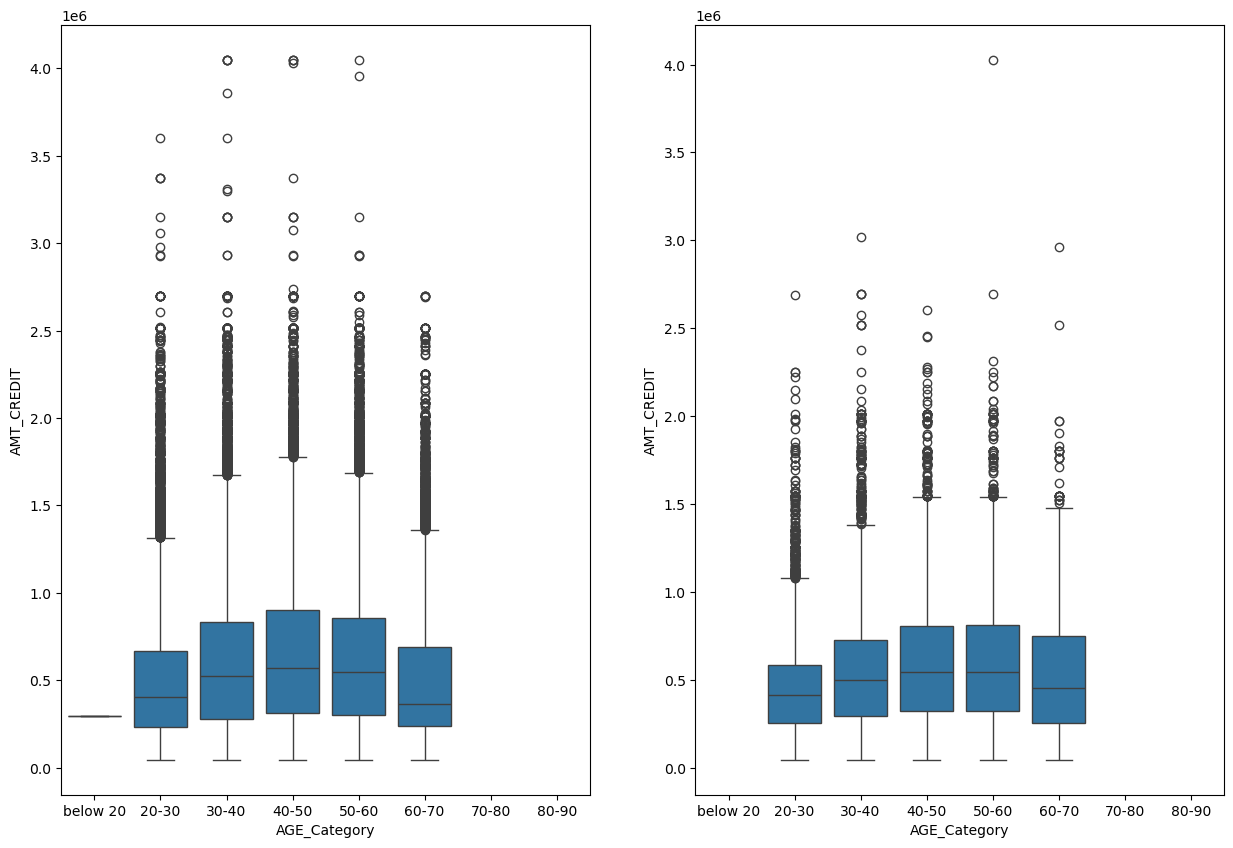

In [655]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
sns.boxplot(x='AGE_Category', y = 'AMT_CREDIT', data= tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_Category', y = 'AMT_CREDIT', data= tar_1)
plt.show()

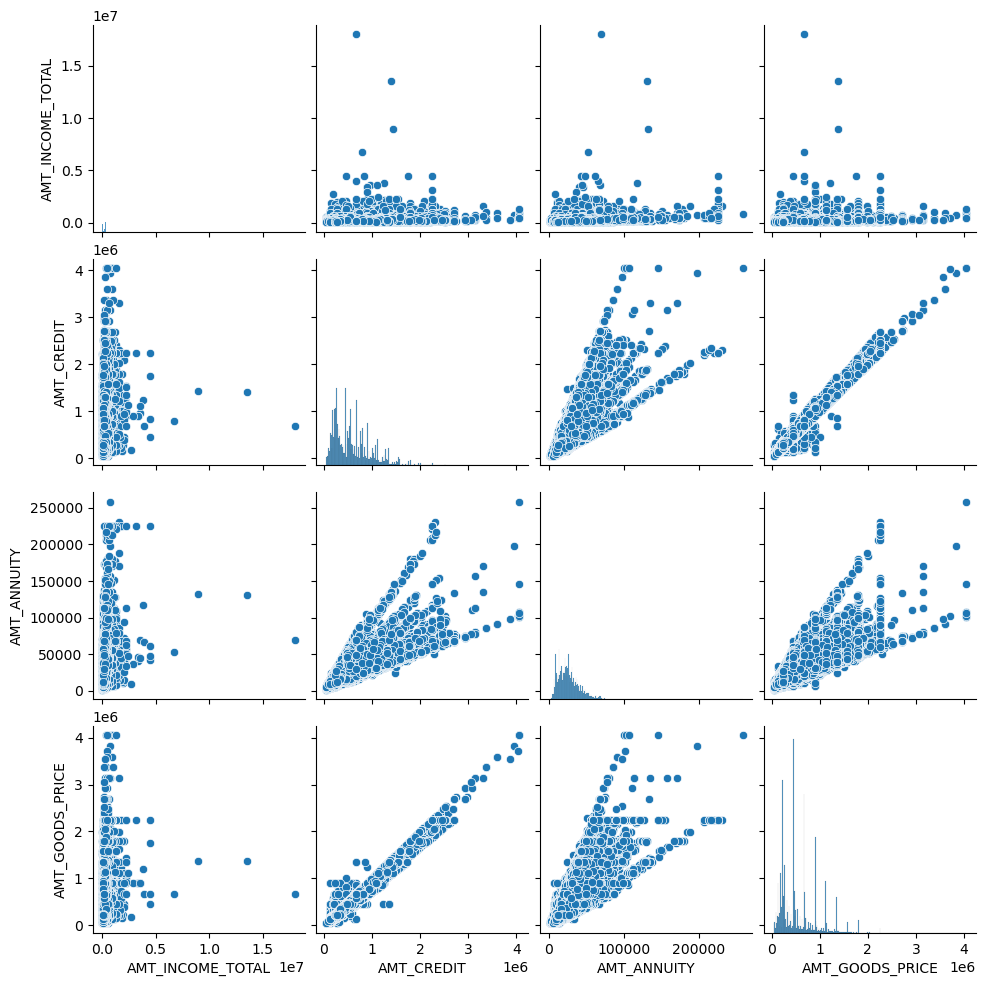

In [656]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

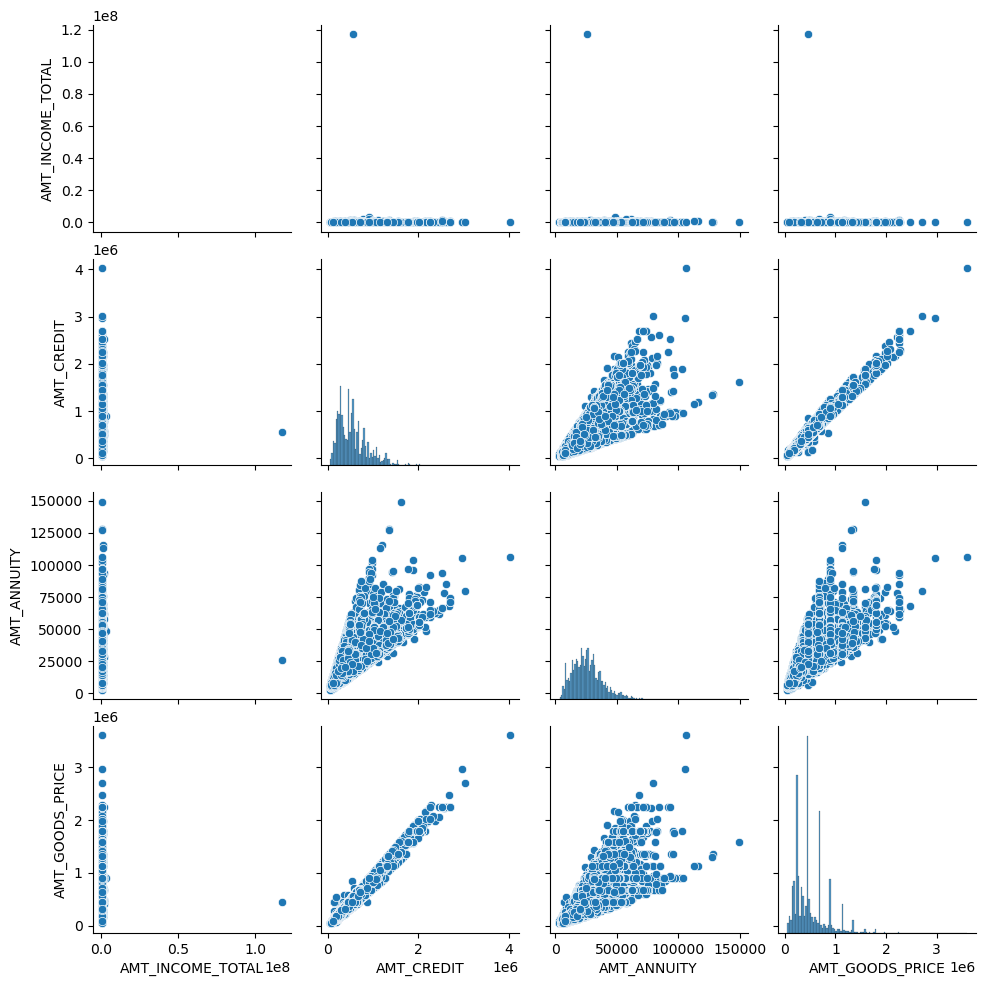

In [657]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

In [658]:
corr_data=app_df[['AMT_INCOME_TOTAL',"AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0    406597.5      24700.5         351000.0           25   
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0               1                   9                 5   
1               3                   3                 0   
2               0                  11                 6   
3               8                  26                 6   
4               8                  11                 9   

   YEARS_LAST_PHONE_CHANGE  
0                        3  
1                        2  
2                        2  
3                        1  
4                        3

In [659]:
corr_data.corr()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                 1.000000    0.156870     0.191657   
AMT_CREDIT                       0.156870    1.000000     0.770127   
AMT_ANNUITY                      0.191657    0.770127     1.000000   
AMT_GOODS_PRICE                  0.159632    0.986734     0.774837   
YEARS_BIRTH                     -0.027226    0.055408    -0.009453   
YEARS_EMPLOYED                  -0.063836   -0.064319    -0.102853   
YEARS_REGISTRATION              -0.027783   -0.009521    -0.038375   
YEARS_ID_PUBLISH                -0.008648    0.006831    -0.011100   
YEARS_LAST_PHONE_CHANGE          0.018592    0.077057     0.064893   

                         AMT_GOODS_PRICE  YEARS_BIRTH  YEARS_EMPLOYED  \
AMT_INCOME_TOTAL                0.159632    -0.027226       -0.063836   
AMT_CREDIT                      0.986734     0.055408       -0.064319   
AMT_ANNUITY                     0.774837    -0.009453       -0.102853   
AMT_GOODS_PRICE                 1.000000     0.053484       -0.062191   
YEARS_BIRTH                     0.053484     1.000000        0.623879   
YEARS_EMPLOYED                 -0.062191     0.623879        1.000000   
YEARS_REGISTRATION             -0.011456     0.331704        0.214592   
YEARS_ID_PUBLISH                0.009571     0.271453        0.274460   
YEARS_LAST_PHONE_CHANGE         0.079095     0.086527       -0.016393   

                         YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
AMT_INCOME_TOTAL                  -0.027783         -0.008648   
AMT_CREDIT                        -0.009521          0.006831   
AMT_ANNUITY                       -0.038375         -0.011100   
AMT_GOODS_PRICE                   -0.011456          0.009571   
YEARS_BIRTH                        0.331704          0.271453   
YEARS_EMPLOYED                     0.214592          0.274460   
YEARS_REGISTRATION                 1.000000          0.101373   
YEARS_ID_PUBLISH                   0.101373          1.000000   
YEARS_LAST_PHONE_CHANGE            0.058831          0.093213   

                         YEARS_LAST_PHONE_CHANGE  
AMT_INCOME_TOTAL                        0.018592  
AMT_CREDIT                              0.077057  
AMT_ANNUITY                             0.064893  
AMT_GOODS_PRICE                         0.079095  
YEARS_BIRTH                             0.086527  
YEARS_EMPLOYED                         -0.016393  
YEARS_REGISTRATION                      0.058831  
YEARS_ID_PUBLISH                        0.093213  
YEARS_LAST_PHONE_CHANGE                 1.000000

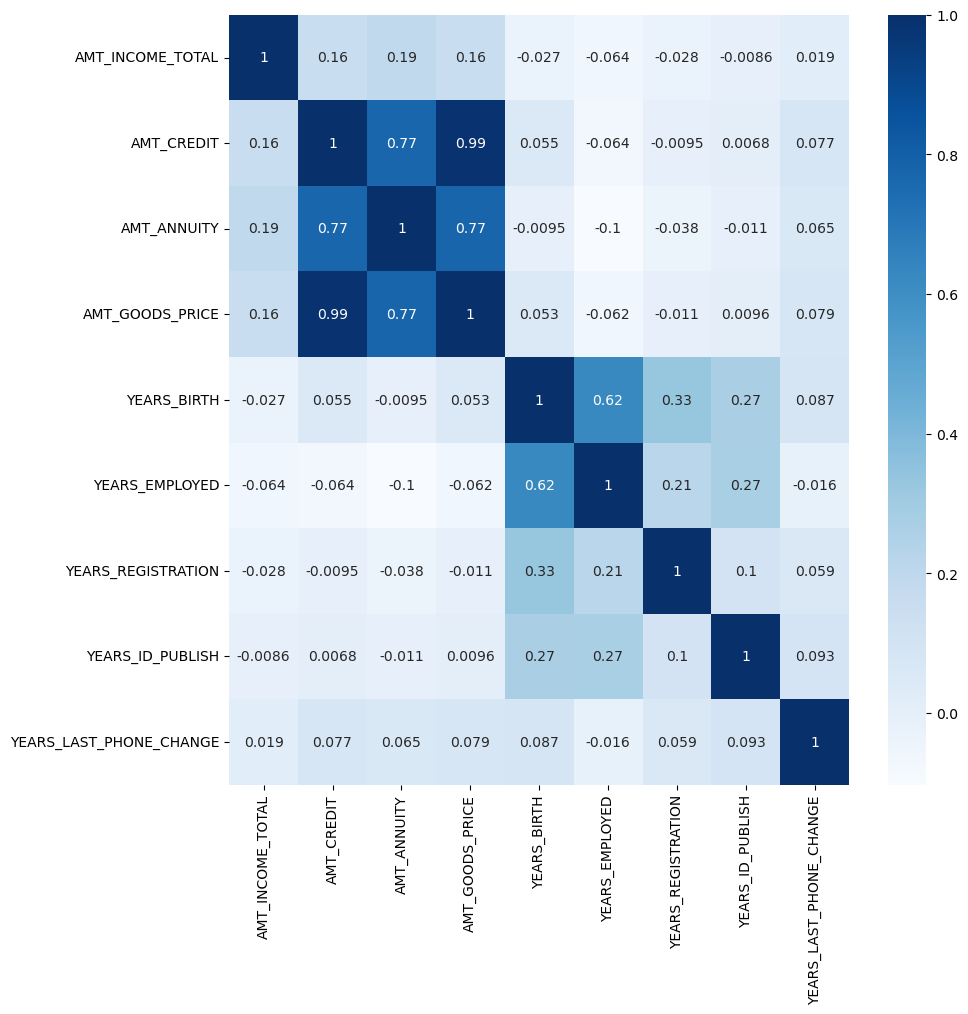

In [660]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data.corr(),annot=True,cmap="Blues")
plt.show()

In [661]:
corr_data_0=tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
1          270000.0   1293502.5      35698.5        1129500.0           45   
2           67500.0    135000.0       6750.0         135000.0           52   
3          135000.0    312682.5      29686.5         297000.0           52   
4          121500.0    513000.0      21865.5         513000.0           54   
5           99000.0    490495.5      27517.5         454500.0           46   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
1               3                   3                 0   
2               0                  11                 6   
3               8                  26                 6   
4               8                  11                 9   
5               4                  13                 1   

   YEARS_LAST_PHONE_CHANGE  
1                        2  
2                        2  
3                        1  
4                        3  
5                        6

In [662]:
corr_data_1=tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0           202500.0    406597.5      24700.5         351000.0           25   
26          112500.0    979992.0      27076.5         702000.0           51   
40          202500.0   1193580.0      35028.0         855000.0           47   
42          135000.0    288873.0      16258.5         238500.0           36   
81           81000.0    252000.0      14593.5         252000.0           67   

    YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  \
0                1                   9                 5   
26               7                  18                 5   
40               3                   3                 2   
42               9                   0                12   
81            1000                  14                11   

    YEARS_LAST_PHONE_CHANGE  
0                         3  
26                        0  
40                        2  
42                        4  
81                        0

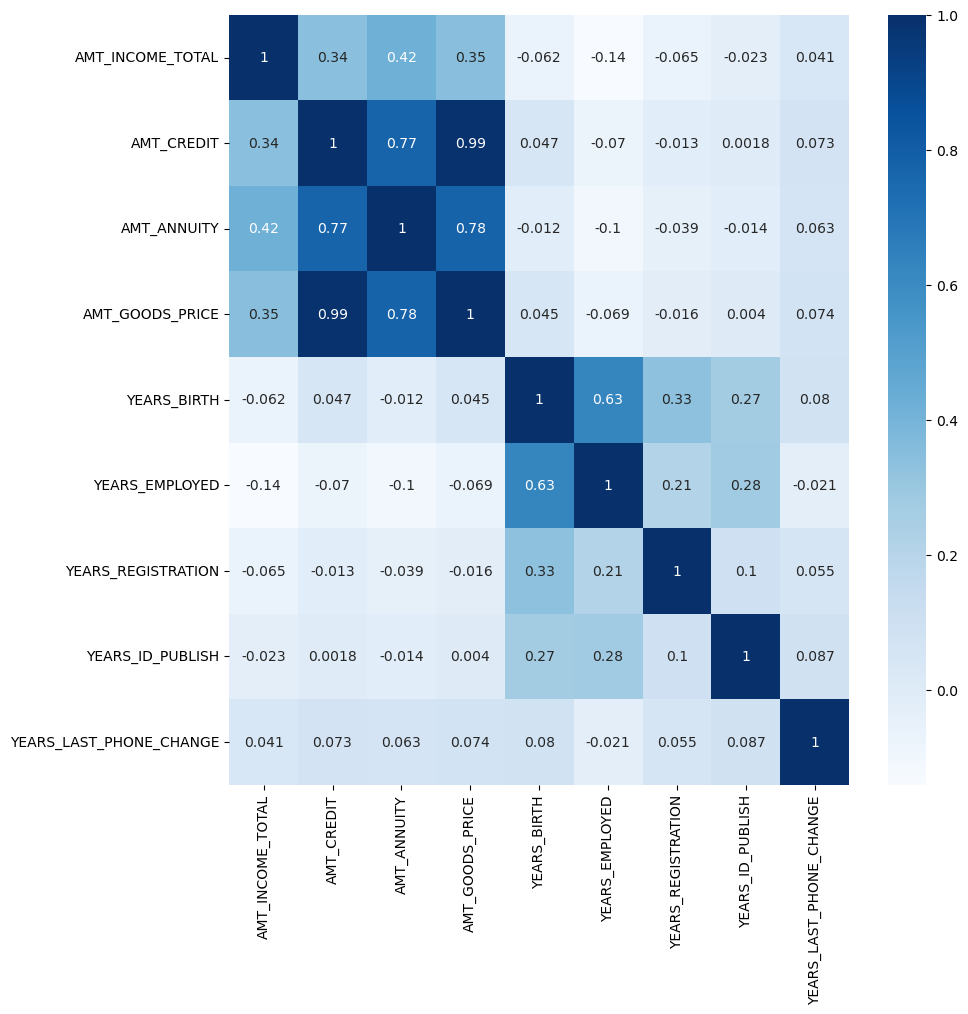

In [663]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_0.corr(),annot=True,cmap="Blues")
plt.show()

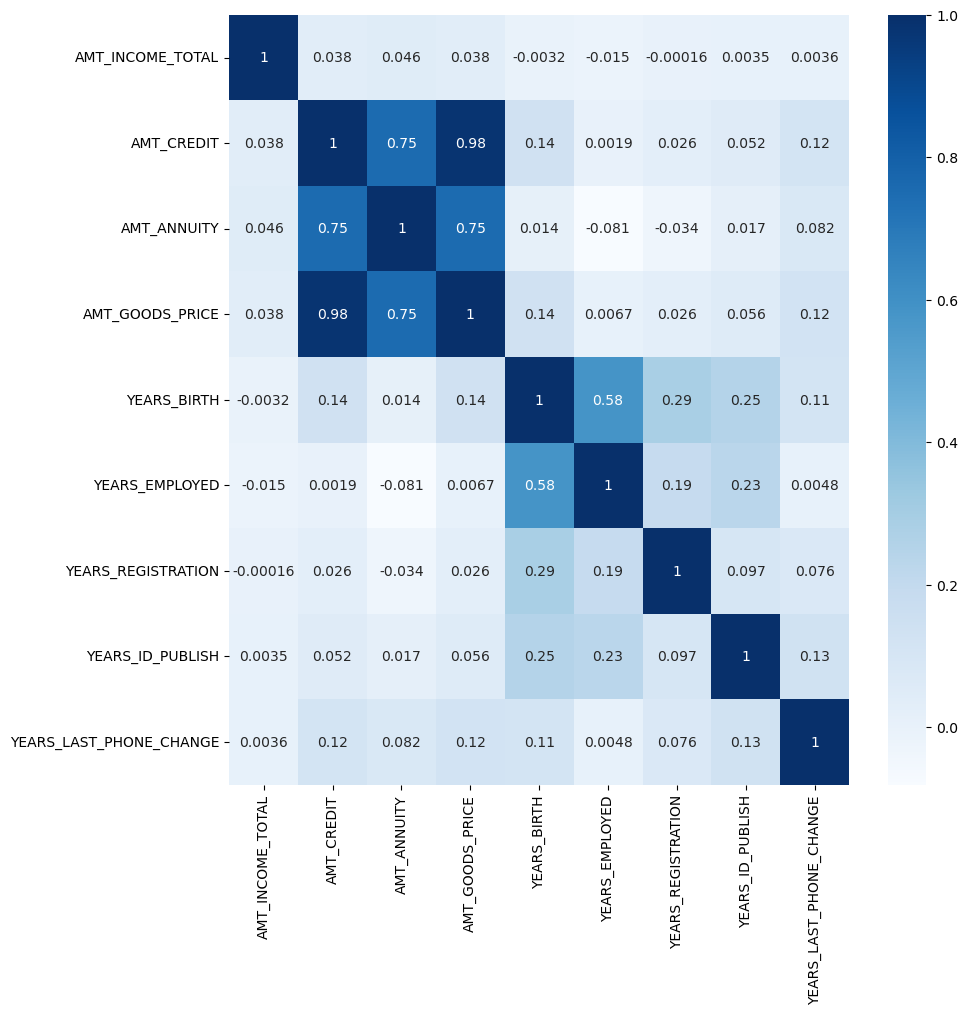

In [664]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_data_1.corr(),annot=True,cmap="Blues")
plt.show()

Previous Application CSV

In [665]:
p_data = pd.read_csv(r"C:\Users\vishn\Downloads\previous_application.csv")
p_data.head()

Unnamed: 0  SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           0     2030495      271877     Consumer loans     1730.430   
1           1     2802425      108129         Cash loans    25188.615   
2           2     2523466      122040         Cash loans    15060.735   
3           3     2819243      176158         Cash loans    47041.335   
4           4     1784265      202054         Cash loans    31924.395   

   AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0          17145.0     17145.0               0.0          17145.0   
1         607500.0    679671.0               NaN         607500.0   
2         112500.0    136444.5               NaN         112500.0   
3         450000.0    470790.0               NaN         450000.0   
4         337500.0    404055.0               NaN         337500.0   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   SATURDAY                       15   
1                   THURSDAY                       11   
2                    TUESDAY                       11   
3                     MONDAY                        7   
4                   THURSDAY                        9   

  FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
0                           Y                       1                0.0   
1                           Y                       1                NaN   
2                           Y                       1                NaN   
3                           Y                       1                NaN   
4                           Y                       1                NaN   

   RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE  \
0               0.182832                  0.867336                    XAP   
1                    NaN                       NaN                    XNA   
2                    NaN                       NaN                    XNA   
3                    NaN                       NaN                    XNA   
4                    NaN                       NaN                Repairs   

  NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE  \
0             Approved            -73  Cash through the bank   
1             Approved           -164                    XNA   
2             Approved           -301  Cash through the bank   
3             Approved           -512  Cash through the bank   
4              Refused           -781  Cash through the bank   

  CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY  \
0                XAP              NaN         Repeater              Mobile   
1                XAP    Unaccompanied         Repeater                 XNA   
2                XAP  Spouse, partner         Repeater                 XNA   
3                XAP              NaN         Repeater                 XNA   
4                 HC              NaN         Repeater                 XNA   

  NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  \
0            POS               XNA             Country-wide                35   
1           Cash            x-sell           Contact center                -1   
2           Cash            x-sell  Credit and cash offices                -1   
3           Cash            x-sell  Credit and cash offices                -1   
4           Cash           walk-in  Credit and cash offices                -1   

  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP  \
0         Connectivity         12.0           middle   
1                  XNA         36.0       low_action   
2                  XNA         12.0             high   
3                  XNA         12.0           middle   
4                  XNA         24.0             high   

        PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0  POS mobile with interest            365243.0           -42.0   
1          Cash X-Sell: low            365243.0          -134.0   
2      

In [666]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 38 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Unnamed: 0                   1413701 non-null  int64  
 1   SK_ID_PREV                   1413701 non-null  int64  
 2   SK_ID_CURR                   1413701 non-null  int64  
 3   NAME_CONTRACT_TYPE           1413701 non-null  object 
 4   AMT_ANNUITY                  1106483 non-null  float64
 5   AMT_APPLICATION              1413701 non-null  float64
 6   AMT_CREDIT                   1413700 non-null  float64
 7   AMT_DOWN_PAYMENT             664161 non-null   float64
 8   AMT_GOODS_PRICE              1094176 non-null  float64
 9   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 10  HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 11  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 12  NFLAG_LAST_APPL_IN_DAY       1413701 non-n

In [667]:
p_data.shape

(1413701, 38)

In [668]:
p_data.isnull().mean()*100

Unnamed: 0                      0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.731469
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000071
AMT_DOWN_PAYMENT               53.019698
AMT_GOODS_PRICE                22.602021
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.019698
RATE_INTEREST_PRIMARY          99.661102
RATE_INTEREST_PRIVILEGED       99.661102
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.138538
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO  

In [669]:
percentage=49
threshold=int(((100-percentage)/100)*p_data.shape[0]+1)
p_df=p_data.dropna(axis=1,thresh=threshold)
p_df.head()

Unnamed: 0  SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           0     2030495      271877     Consumer loans     1730.430   
1           1     2802425      108129         Cash loans    25188.615   
2           2     2523466      122040         Cash loans    15060.735   
3           3     2819243      176158         Cash loans    47041.335   
4           4     1784265      202054         Cash loans    31924.395   

   AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0          17145.0     17145.0          17145.0                   SATURDAY   
1         607500.0    679671.0         607500.0                   THURSDAY   
2         112500.0    136444.5         112500.0                    TUESDAY   
3         450000.0    470790.0         450000.0                     MONDAY   
4         337500.0    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2

In [670]:
p_df.shape

(1413701, 33)

In [671]:
for col in p_df.columns:
    if p_df[col].dtypes==np.int64 or p_df[col].dtypes==np.float64:
        p_df[col]=p_df[col].apply(lambda x:abs(x))

In [672]:
null_Cols=list(p_df.columns[p_df.isna().any()])
len(null_Cols)

11

In [673]:
p_df.isnull().mean()*100

Unnamed: 0                      0.000000
SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.731469
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000071
AMT_GOODS_PRICE                22.602021
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [674]:
p_df.AMT_CREDIT.describe()

count    1.413700e+06
mean     1.963541e+05
std      3.194813e+05
min      0.000000e+00
25%      2.488050e+04
50%      8.059500e+04
75%      2.156400e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64

In [675]:
p_df["AMT_CREDIT_Category"] = pd.cut(
    p_df["AMT_CREDIT"],
    bins=[0, 20000, 40000, 60000, 80000, 1000000],
    labels=["Very low credit", "Low credit", "Medium credit", "High credit", "Very high credit"]
)

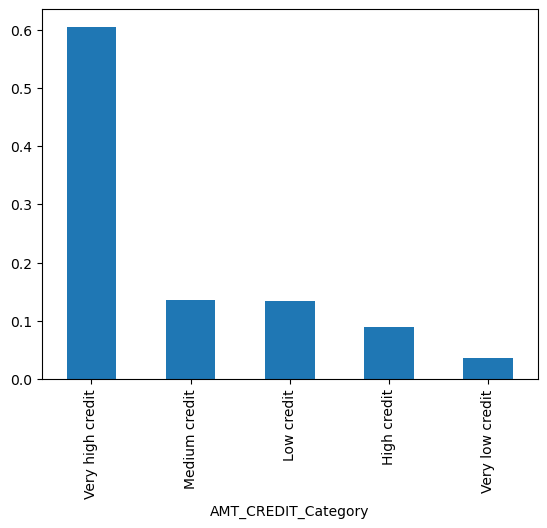

In [676]:
p_df["AMT_CREDIT_Category"].value_counts(normalize=True).plot.bar()
plt.show()

In [677]:
p_df["AMT_GOODS_PRICE_Category"]=pd.qcut(p_df.AMT_GOODS_PRICE,q=[0,0.25,0.45,0.65,0.85,1],labels=["Very low price","Low price","Medium price","High price","Very high price"])

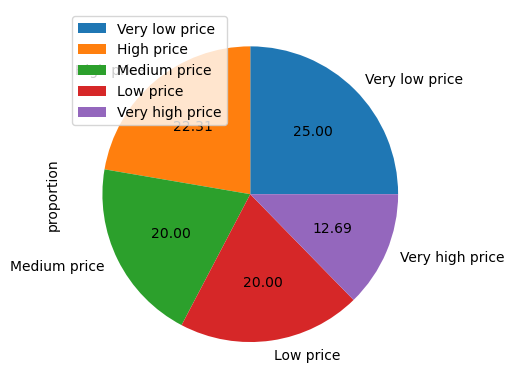

In [678]:
p_df["AMT_GOODS_PRICE_Category"].value_counts(normalize=True).plot.pie(autopct='%1.2f')
plt.legend()
plt.show()

Imbalance Check

In [679]:
approved=p_df[p_df.NAME_CONTRACT_STATUS=='Approved']
cancelled=p_df[p_df.NAME_CONTRACT_STATUS=='Canceled']
refused=p_df[p_df.NAME_CONTRACT_STATUS=='Refused']
unused=p_df[p_df.NAME_CONTRACT_STATUS=="Unused offer"]

In [680]:
p_df.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: proportion, dtype: float64

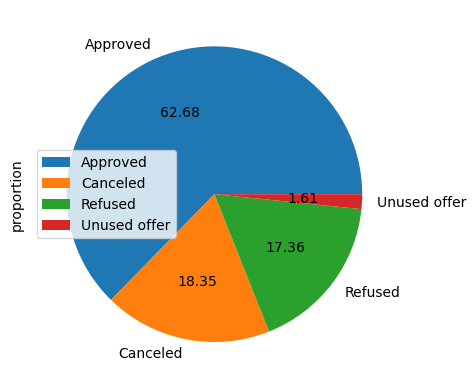

In [681]:
p_df.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie(autopct='%1.2f')
plt.legend()
plt.show()

In [682]:
cat_cols=list(p_df.columns[p_df.dtypes==object])
num_cols=list(p_df.columns[p_df.dtypes==np.int64])+list([p_df.columns[p_df.dtypes==np.float64]])

In [683]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [684]:
num_cols

['Unnamed: 0',
 'SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
        'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
        'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
        'NFLAG_INSURED_ON_APPROVAL'],
       dtype='object')]

In [685]:
cat_cols=['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [686]:
num_cols=cat_cols=['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

NAME_CONTRACT_TYPE
Cash loans         44.334976
Consumer loans     44.228306
Revolving loans    11.414578
XNA                 0.022140
Name: proportion, dtype: float64


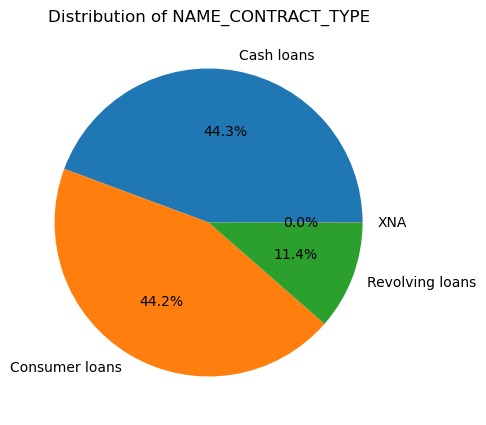

WEEKDAY_APPR_PROCESS_START
WEDNESDAY    15.245020
TUESDAY      15.212411
MONDAY       15.173576
FRIDAY       15.093220
THURSDAY     14.925716
SATURDAY     14.441455
SUNDAY        9.908602
Name: proportion, dtype: float64


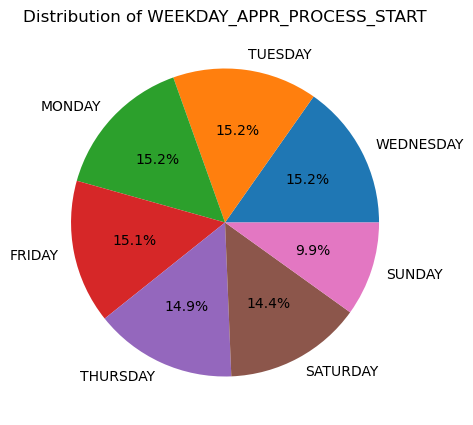

FLAG_LAST_APPL_PER_CONTRACT
Y    99.482635
N     0.517365
Name: proportion, dtype: float64


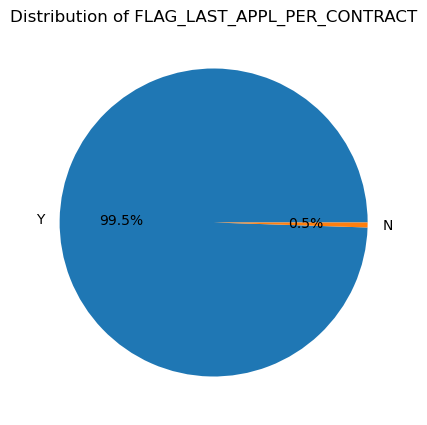

NAME_CASH_LOAN_PURPOSE
XAP                                 55.665024
XNA                                 40.132319
Repairs                              1.423002
Other                                0.950130
Urgent needs                         0.511848
Buying a used car                    0.174648
Building a house or an annex         0.165806
Everyday expenses                    0.145151
Medicine                             0.132348
Payments on other loans              0.111268
Education                            0.094362
Journey                              0.073707
Purchase of electronic equipment     0.066068
Buying a new car                     0.062672
Wedding / gift / holiday             0.056660
Buying a home                        0.049586
Car repairs                          0.048879
Furniture                            0.046686
Buying a holiday home / land         0.032751
Business development                 0.025394
Gasification / water supply          0.017755
Buying a ga

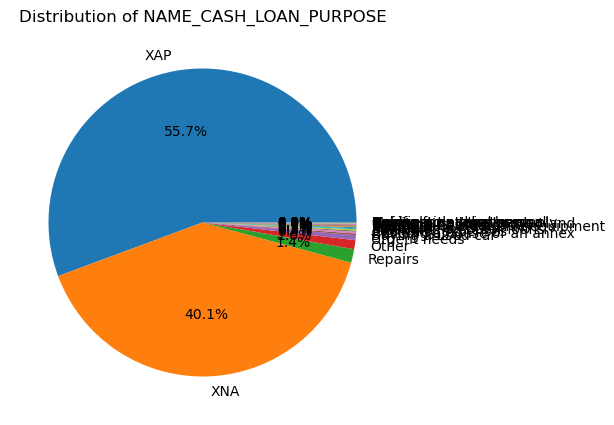

NAME_CONTRACT_STATUS
Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: proportion, dtype: float64


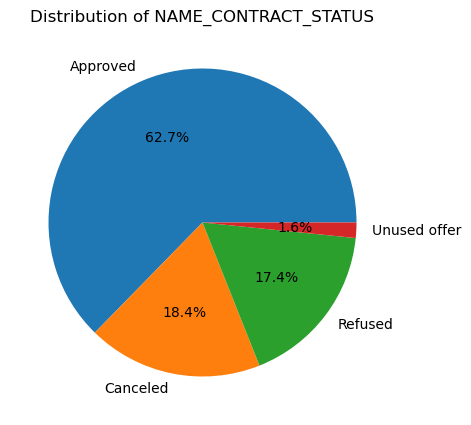

NAME_PAYMENT_TYPE
Cash through the bank                        62.438946
XNA                                          36.992264
Non-cash from your account                    0.502228
Cashless from the account of the employer     0.066563
Name: proportion, dtype: float64


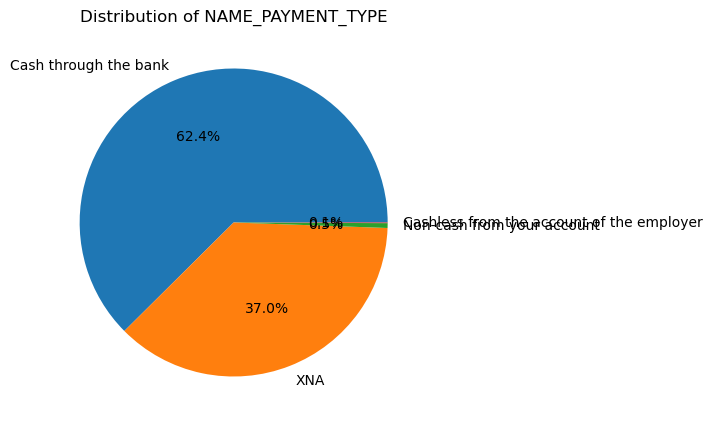

CODE_REJECT_REASON
XAP       81.030784
HC        10.326370
LIMIT      3.379286
SCO        2.308550
CLIENT     1.610737
SCOFR      0.769257
XNA        0.309684
VERIF      0.217797
SYSTEM     0.047535
Name: proportion, dtype: float64


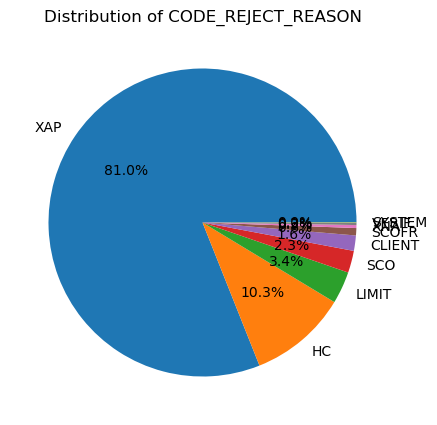

NAME_CLIENT_TYPE
Repeater     73.401801
New          18.358903
Refreshed     8.130149
XNA           0.109146
Name: proportion, dtype: float64


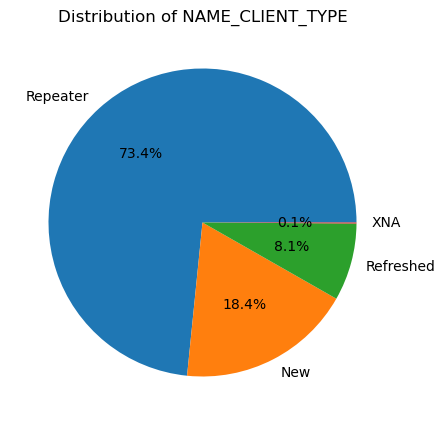

NAME_GOODS_CATEGORY
XNA                         56.391627
Mobile                      13.704666
Consumer Electronics         7.412105
Computers                    6.360822
Audio/Video                  6.048096
Furniture                    3.214187
Photo / Cinema Equipment     1.535473
Construction Materials       1.510645
Clothing and Accessories     1.385724
Auto Accessories             0.440546
Jewelry                      0.366980
Homewares                    0.304803
Medical Supplies             0.229186
Vehicles                     0.201881
Sport and Leisure            0.179670
Other                        0.165311
Gardening                    0.164250
Office Appliances            0.140412
Tourism                      0.093655
Medicine                     0.092099
Direct Sales                 0.023343
Fitness                      0.011742
Additional Service           0.007710
Education                    0.006296
Weapon                       0.004598
Insurance                    0

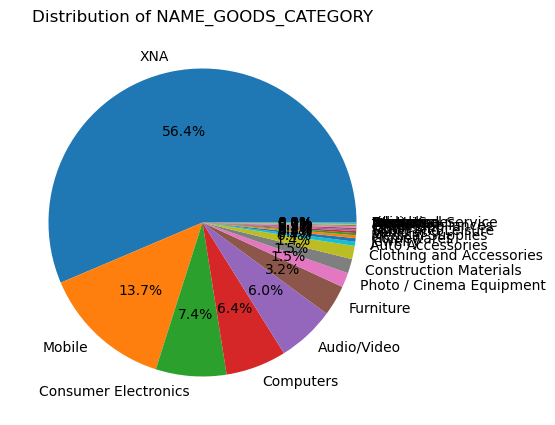

NAME_PORTFOLIO
POS      41.908437
Cash     27.704798
XNA      21.731116
Cards     8.628769
Cars      0.026880
Name: proportion, dtype: float64


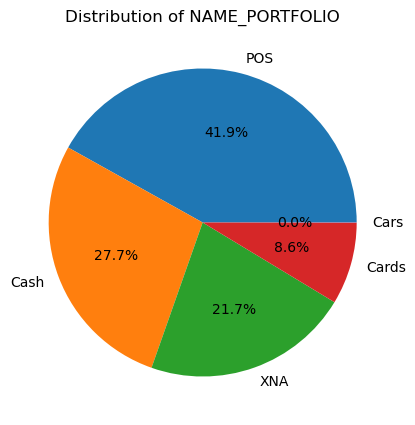

NAME_PRODUCT_TYPE
XNA        63.666433
x-sell     27.261352
walk-in     9.072215
Name: proportion, dtype: float64


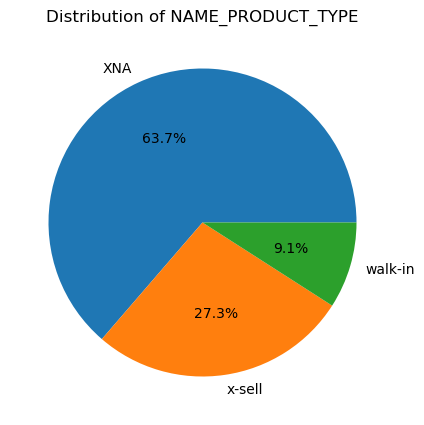

CHANNEL_TYPE
Credit and cash offices       42.465981
Country-wide                  29.925847
Stone                         12.980680
Regional / Local               6.541129
Contact center                 4.165732
AP+ (Cash loan)                3.510219
Channel of corporate sales     0.381693
Car dealer                     0.028719
Name: proportion, dtype: float64


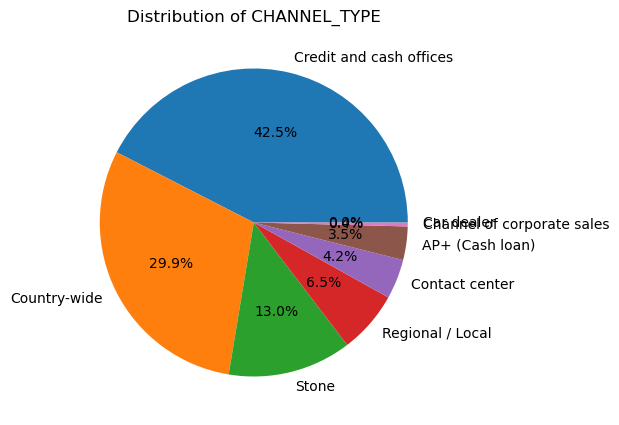

NAME_SELLER_INDUSTRY
XNA                     50.599243
Consumer electronics    24.170670
Connectivity            16.860001
Furniture                3.463674
Construction             1.797905
Clothing                 1.407370
Industry                 1.171889
Auto technology          0.288604
Jewelry                  0.149041
MLM partners             0.065148
Tourism                  0.026455
Name: proportion, dtype: float64


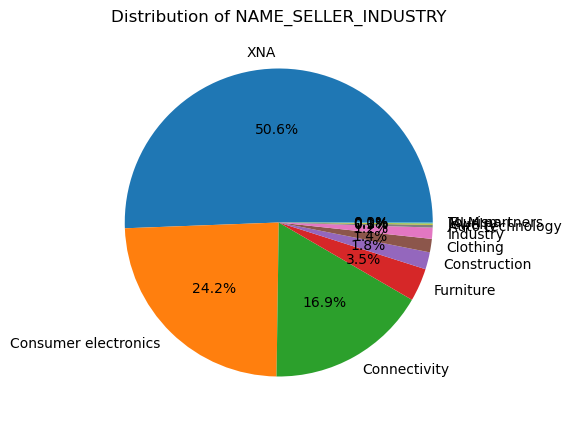

NAME_YIELD_GROUP
XNA           30.359885
middle        22.987251
high          21.649627
low_normal    19.444281
low_action     5.558955
Name: proportion, dtype: float64


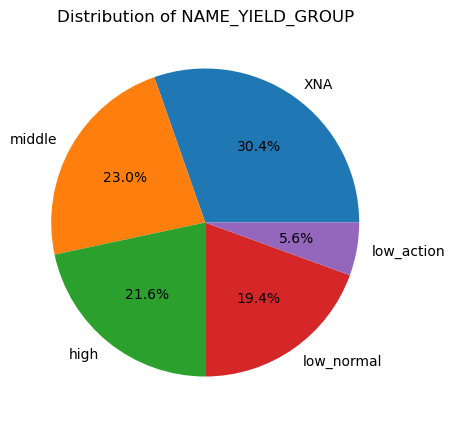

PRODUCT_COMBINATION
Cash                              16.633861
POS household with interest       16.022776
POS mobile with interest          13.503015
Cash X-Sell: middle                8.492785
Cash X-Sell: low                   7.825098
Card Street                        6.692713
POS industry with interest         5.908356
POS household without interest     5.060111
Card X-Sell                        4.724393
Cash Street: high                  3.657807
Cash X-Sell: high                  3.594342
Cash Street: middle                2.117890
Cash Street: low                   2.023011
POS other with interest            1.436902
POS mobile without interest        1.407257
POS industry without interest      0.751457
POS others without interest        0.148225
Name: proportion, dtype: float64


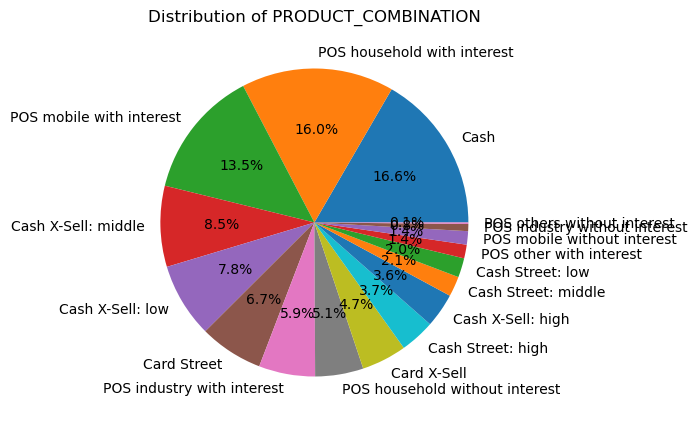

In [687]:
for col in cat_cols:
    print(p_df[col].value_counts(normalize=True)*100)
    plt.figure(figsize=[5,5])
    p_df[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
    plt.title(f"Distribution of {col}")
    plt.ylabel("")
    plt.show()

Conclusions from the  above graphs

1)NAME_CONTRACT_TYPE – Around 45% of applicants had Cash loans, 44% had Consumer loans, and 12% had Revolving loans in their previous applications.

2)WEEKDAY_APPR_PROCESS_START – Loan applications were fairly evenly distributed across all weekdays.

3)NAME_CONTRACT_STATUS – 62% of applications were approved, while 19% were cancelled, 17% refused, and 2% remained unused.

4)NAME_PAYMENT_TYPE – Cash through bank was the primary mode of payment (62%), with the remaining 32% using other payment methods.

5)NAME_CLIENT_TYPE – The majority of applicants (74%) were repeat clients, 18% were new clients, and 8% were refreshed applicants.

6)NAME_SELLER_INDUSTRY – Most sellers (51%) belonged to other industries, followed by Consumer electronics (24%) and Connectivity (17%).

7)CHANNEL_TYPE – The main channel for applications was Credit and cash offices (43%), followed by countrywide channels (29%).

8)NAME_YIELD_GROUP – The largest share of yield group falls under the “Others” category.

9)PRODUCT_COMBINATION – The most common product combination was Cash loans, followed by POS household with interest and POS mobile with interest.


Column: Unnamed: 0
99th Percentile: 1653488.0
count    1.413701e+06
mean     8.351229e+05
std      4.822308e+05
min      0.000000e+00
25%      4.173070e+05
50%      8.354970e+05
75%      1.252900e+06
max      1.670213e+06
Name: Unnamed: 0, dtype: float64


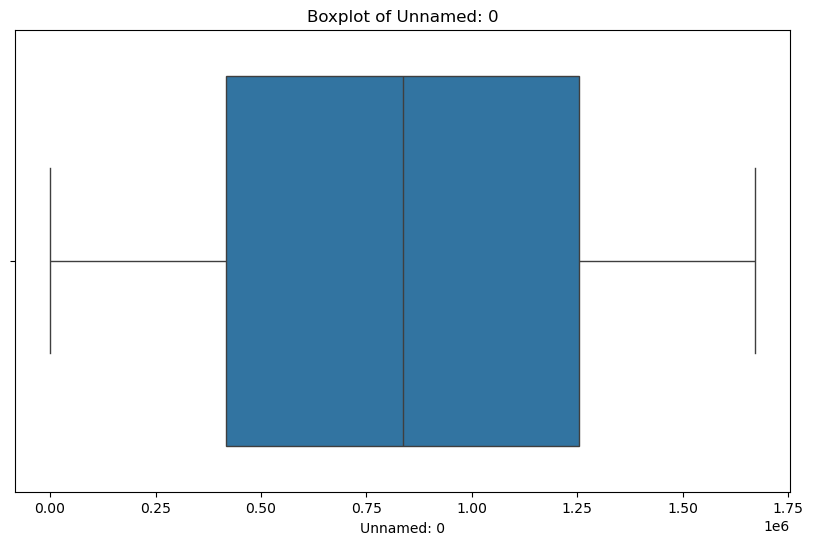

---------------

Column: SK_ID_PREV
99th Percentile: 2826954.0
count    1.413701e+06
mean     1.922744e+06
std      5.327153e+05
min      1.000001e+06
25%      1.461346e+06
50%      1.922698e+06
75%      2.384012e+06
max      2.845381e+06
Name: SK_ID_PREV, dtype: float64


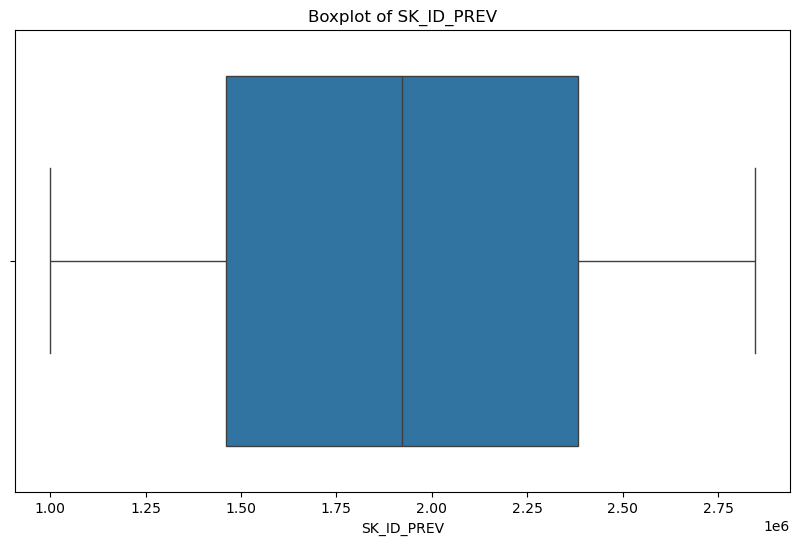

---------------

Column: SK_ID_CURR
99th Percentile: 452828.0
count    1.413701e+06
mean     2.784813e+05
std      1.028118e+05
min      1.000020e+05
25%      1.893640e+05
50%      2.789920e+05
75%      3.675560e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64


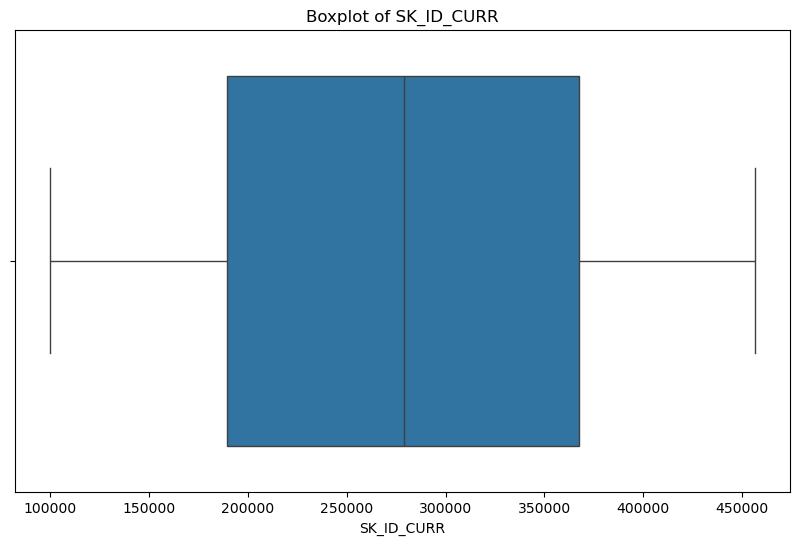

---------------

Column: AMT_ANNUITY
99th Percentile: 69364.215
count    1.106483e+06
mean     1.583718e+04
std      1.472491e+04
min      0.000000e+00
25%      6.257858e+03
50%      1.122376e+04
75%      2.042078e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


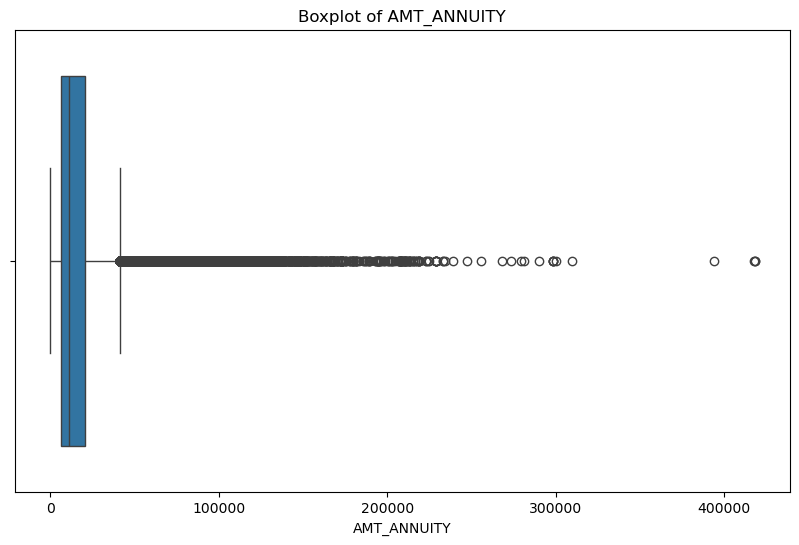

---------------

Column: AMT_APPLICATION
99th Percentile: 1350000.0
count    1.413701e+06
mean     1.752436e+05
std      2.936222e+05
min      0.000000e+00
25%      1.975050e+04
50%      7.087050e+04
75%      1.800000e+05
max      5.850000e+06
Name: AMT_APPLICATION, dtype: float64


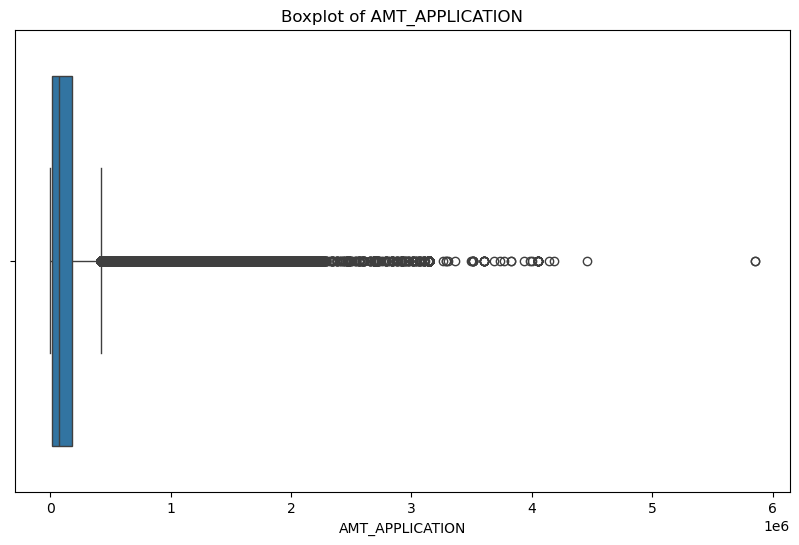

---------------

Column: AMT_CREDIT
99th Percentile: 1515415.5
count    1.413700e+06
mean     1.963541e+05
std      3.194813e+05
min      0.000000e+00
25%      2.488050e+04
50%      8.059500e+04
75%      2.156400e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64


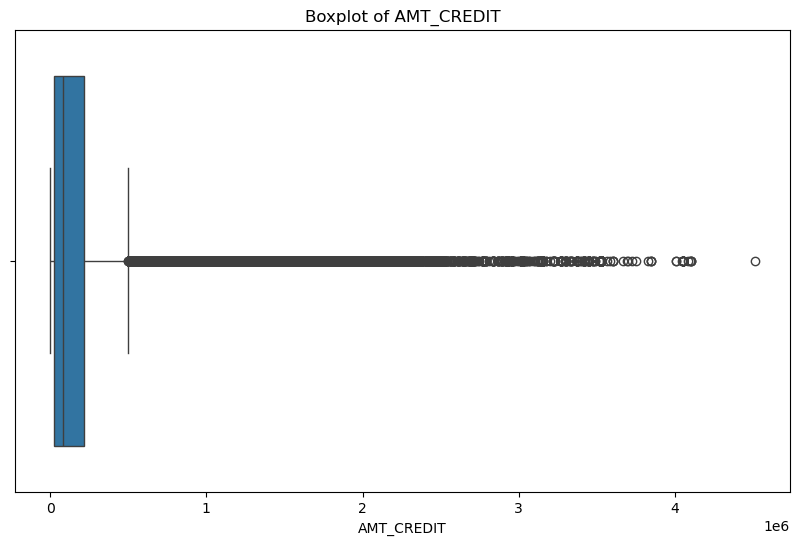

---------------

Column: AMT_GOODS_PRICE
99th Percentile: 1395000.0
count    1.094176e+06
mean     2.264512e+05
std      3.159376e+05
min      0.000000e+00
25%      4.982850e+04
50%      1.102455e+05
75%      2.295000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64


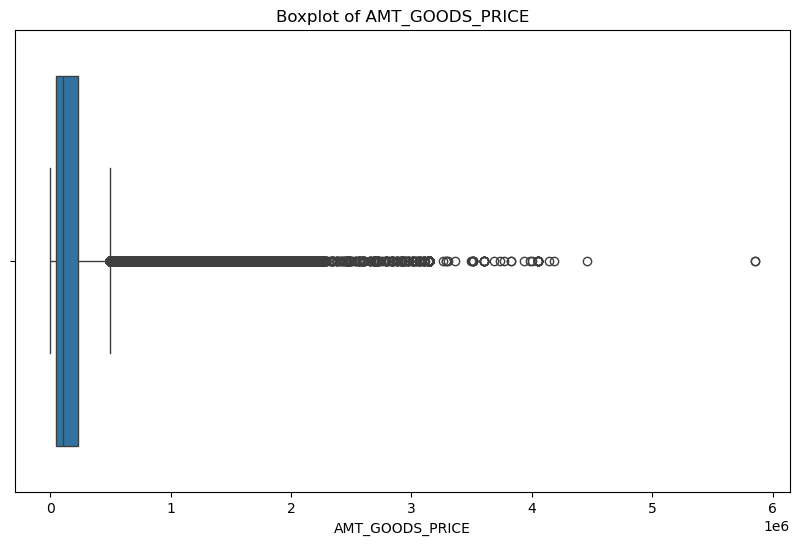

---------------

Column: HOUR_APPR_PROCESS_START
99th Percentile: 20.0
count    1.413701e+06
mean     1.247893e+01
std      3.331474e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


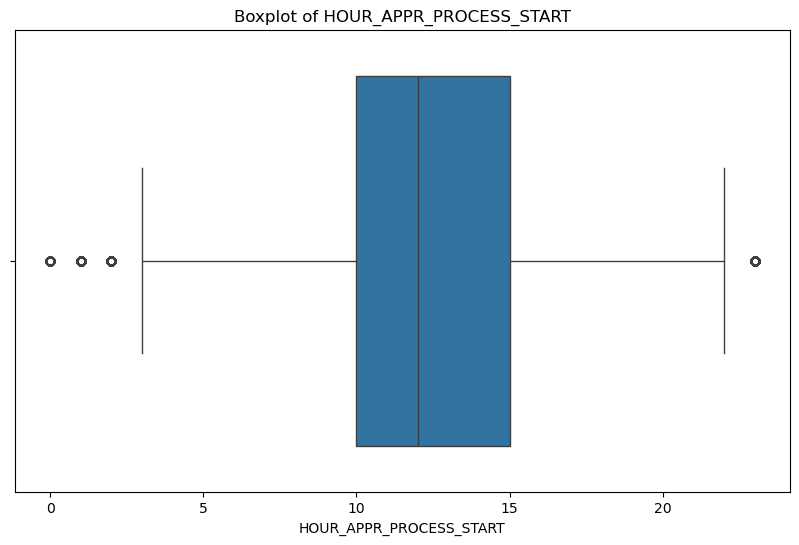

---------------

Column: NFLAG_LAST_APPL_IN_DAY
99th Percentile: 1.0
count    1.413701e+06
mean     9.964321e-01
std      5.962560e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64


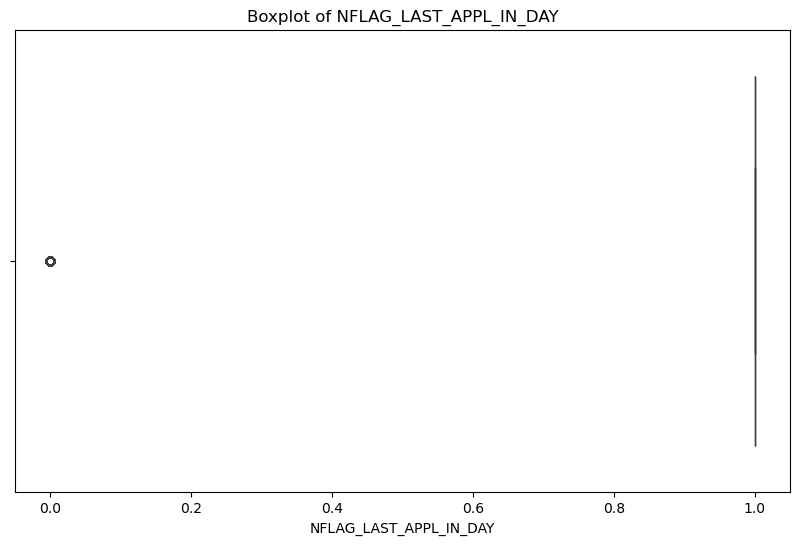

---------------

Column: DAYS_DECISION
99th Percentile: 2832.0
count    1.413701e+06
mean     8.803670e+02
std      7.835402e+02
min      1.000000e+00
25%      2.710000e+02
50%      5.820000e+02
75%      1.313000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


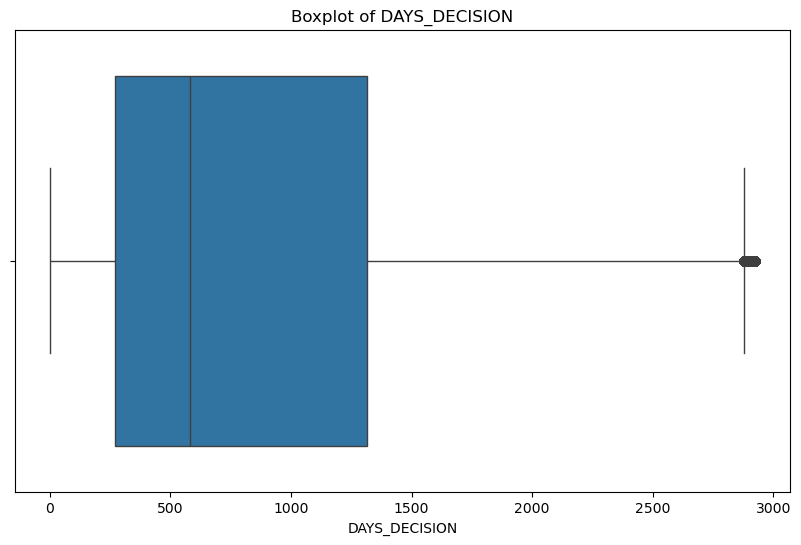

---------------

Column: SELLERPLACE_AREA
99th Percentile: 3570.0
count    1.413701e+06
mean     3.158884e+02
std      7.695045e+03
min      0.000000e+00
25%      1.000000e+00
50%      4.000000e+00
75%      8.500000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


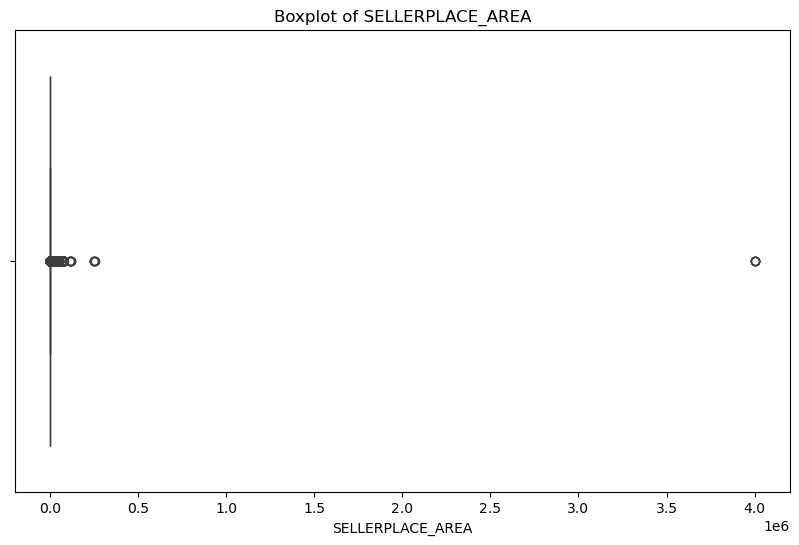

---------------

Column: CNT_PAYMENT
99th Percentile: 60.0
count    1.106488e+06
mean     1.605194e+01
std      1.456675e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


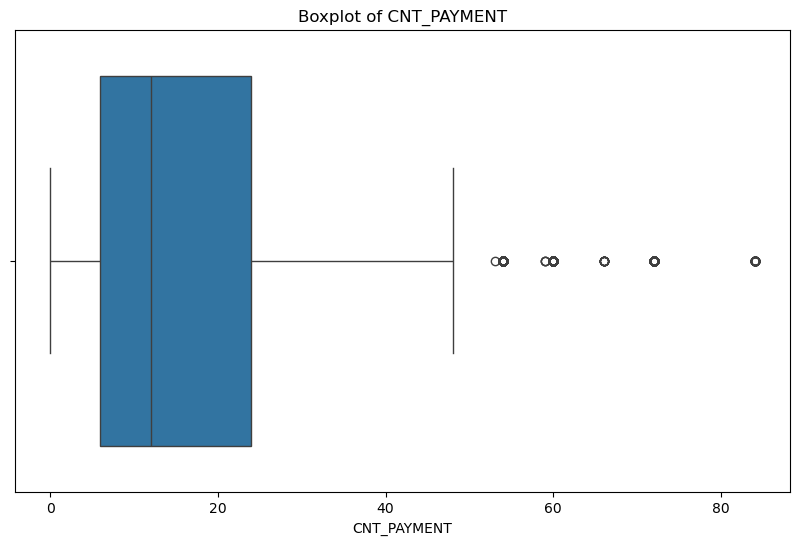

---------------

Column: DAYS_FIRST_DRAWING
99th Percentile: 365243.0
count    852595.000000
mean     342389.778102
std       88321.655956
min           2.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64


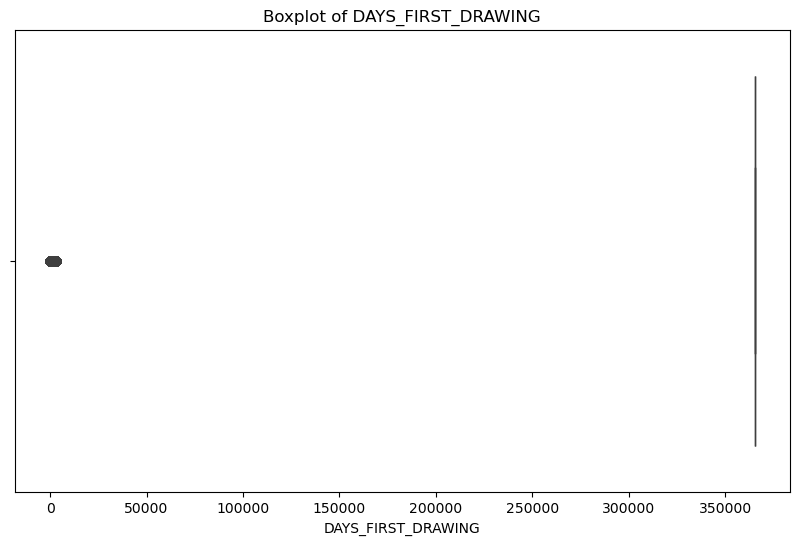

---------------

Column: DAYS_FIRST_DUE
99th Percentile: 365243.0
count    852595.000000
mean      15609.207087
std       71218.272352
min           2.000000
25%         469.000000
50%         916.000000
75%        1828.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64


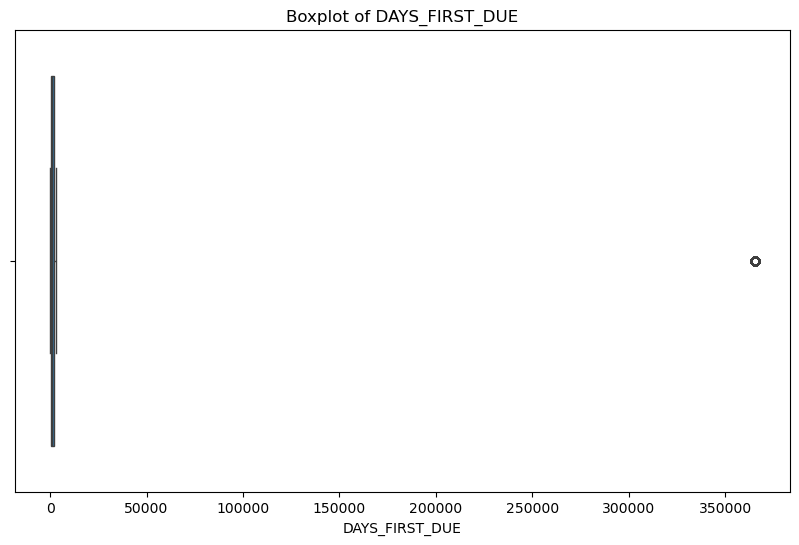

---------------

Column: DAYS_LAST_DUE_1ST_VERSION
99th Percentile: 365243.0
count    852595.000000
mean      34669.503624
std      105714.533099
min           0.000000
25%         256.000000
50%         745.000000
75%        1730.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64


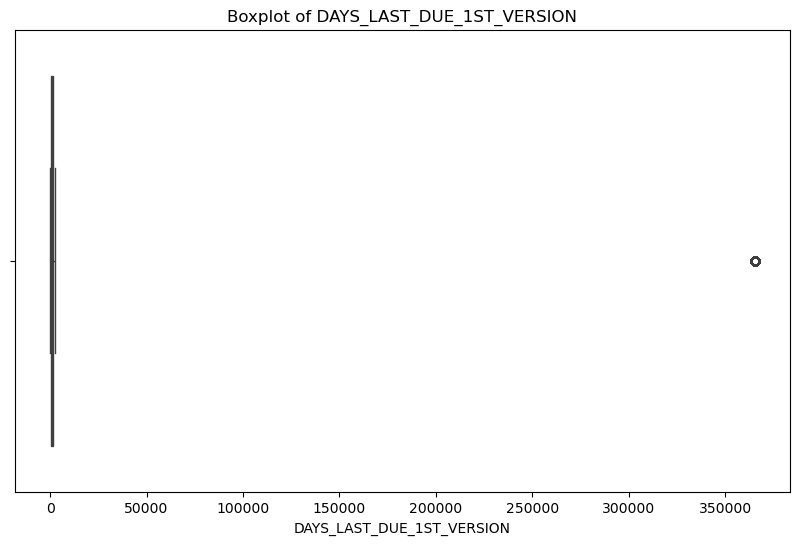

---------------

Column: DAYS_LAST_DUE
99th Percentile: 365243.0
count    852595.000000
mean      78233.262039
std      148891.497682
min           2.000000
25%         453.000000
50%        1156.000000
75%        2413.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64


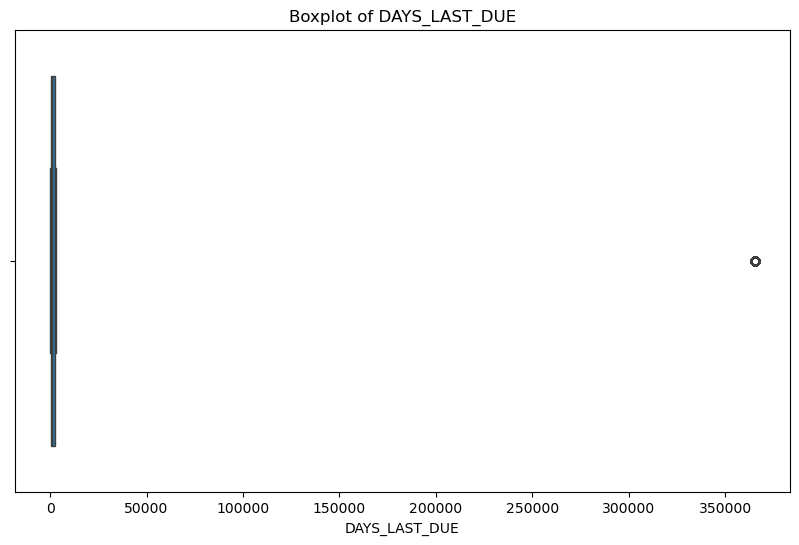

---------------

Column: DAYS_TERMINATION
99th Percentile: 365243.0
count    852595.000000
mean      83862.070031
std      152718.132212
min           2.000000
25%         445.000000
50%        1173.000000
75%        2504.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64


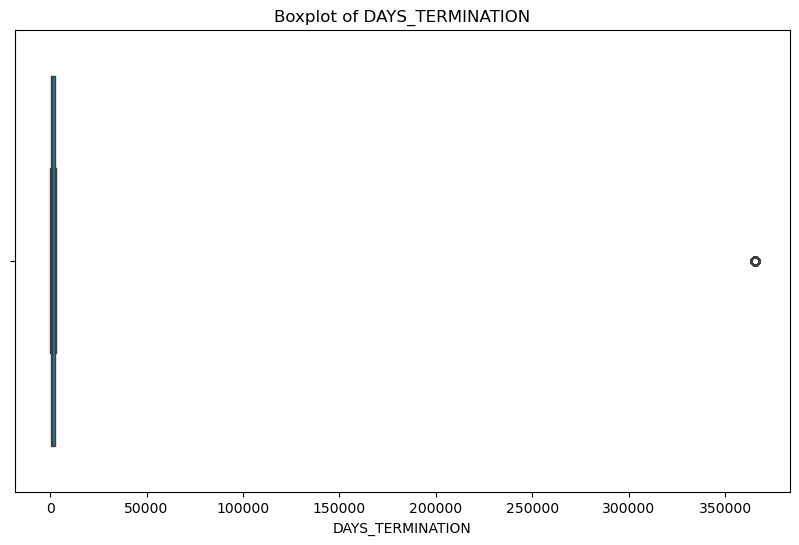

---------------

Column: NFLAG_INSURED_ON_APPROVAL
99th Percentile: 1.0
count    852595.000000
mean          0.330572
std           0.470419
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64


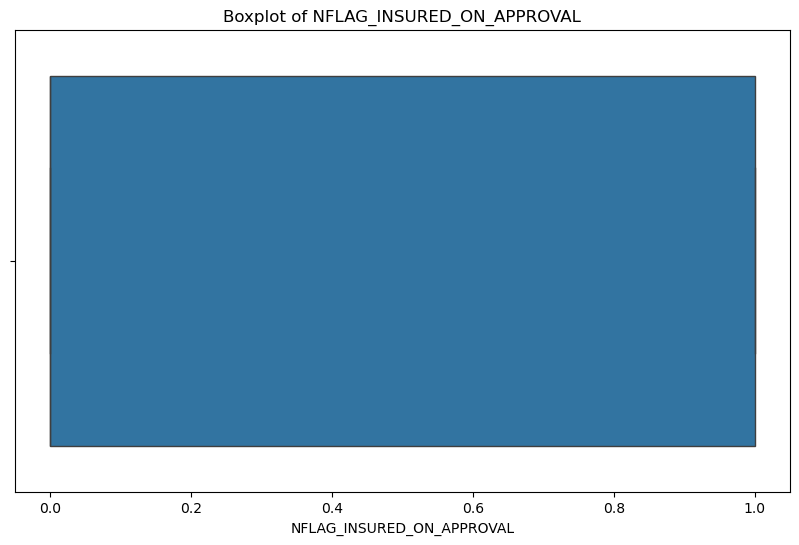

---------------


In [688]:
num_cols = p_df.select_dtypes(include=[np.number]).columns

# Loop through numeric columns
for col in num_cols:
    data = p_df[col].dropna()  # remove NaN values
    
    print(f"\nColumn: {col}")
    print("99th Percentile:", np.percentile(data, 99))
    print(data.describe())
    
    plt.figure(figsize=(10,6))
    sns.boxplot(x=data)
    plt.title(f"Boxplot of {col}")
    plt.show()
    
    print("---------------")

CONCLUSION FROM THE ABOVE GRAPH

1.HOUR_APPR_PROCESS_START – Contains a few outliers, but the mean and median remain fairly close to each other.

2.AMT_CREDIT – Shows some outliers, with a large gap between the 99th percentile and the maximum value, leading to noticeable variation between the mean and median.

3.AMT_ANNUITY – Includes several outliers; the difference between the 99th percentile and the maximum value is large, which causes significant variation between mean and median.

4.AMT_GOODS_PRICE – A few outliers exist, and the gap between the 99th percentile and maximum value is wide, creating considerable shifts between mean and median.

5.AMT_APPLICATION – Contains some extreme outliers, evident from the large difference between the 99th percentile and maximum, which results in a major deviation between mean and median.

6.CNT_PAYMENT – Has a few outliers, though the mean and median differ only slightly.

7.DAYS_DECISION – Includes some outliers, but only a small difference is observed between mean and median.

ANALYSIS ON BIVARIATE AND MULTIVARITE

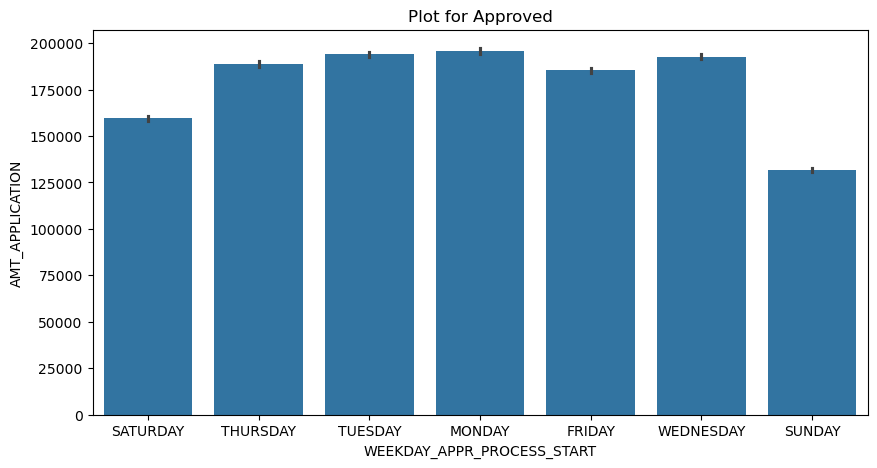

In [689]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=approved)
plt.title("Plot for Approved")
plt.show()

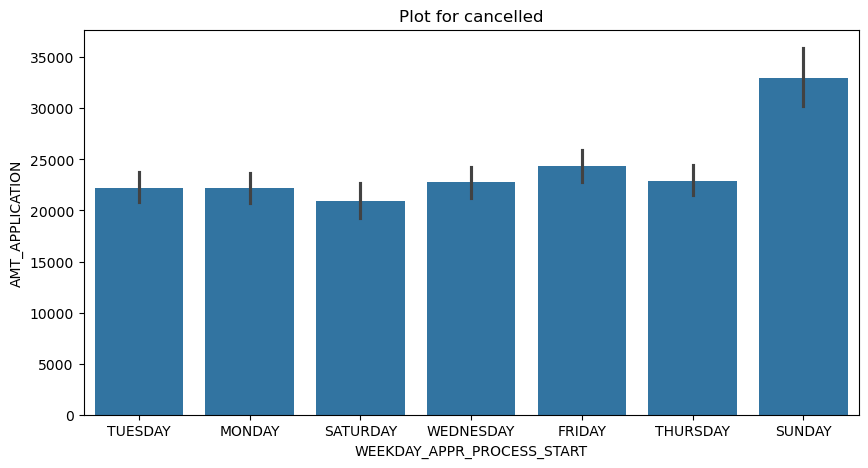

In [690]:
plt.figure(figsize=[10,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y='AMT_APPLICATION',data=cancelled)
plt.title("Plot for cancelled")
plt.show()

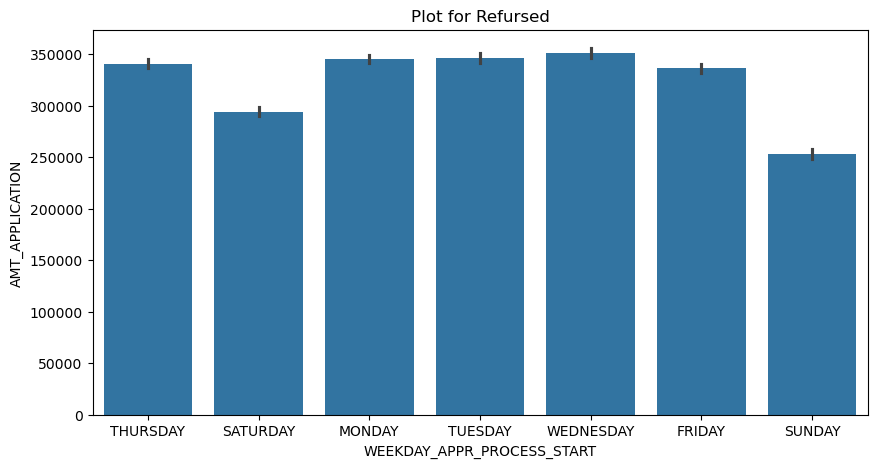

In [691]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="AMT_APPLICATION",data=refused)
plt.title("Plot for Refursed")
plt.show()

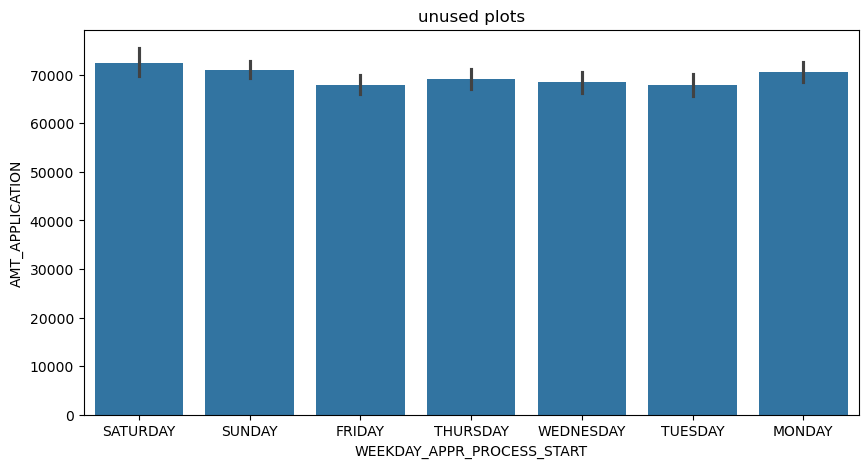

In [692]:
plt.figure(figsize=[10,5])
sns.barplot(x="WEEKDAY_APPR_PROCESS_START",y="AMT_APPLICATION",data=unused)
plt.title("unused plots")
plt.show()

CONCLUSION FROM THE ABOVE GRAPH

1.For approved applications, the credit amount is higher on Monday and Wednesday, and lowest on Sunday.

2.For cancelled applications, the credit amount peaks on Sunday and remains roughly similar on the other days.

3.For rejected applications, the credit amount is lowest on Sunday and higher on Monday and Wednesday.

4.For applications with an unused offer, the credit amount is fairly consistent across all days.

->BIVARIENT ANALYSIS BTW ANNUITY AND GOOD PRIZE 

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("approved")
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=approved)
plt.subplot(1,4,2)
plt.title("cancelled")
sns.scatterplot(x="AMT_ANNUITY",y="AMT_GOODS_PRICE",data=cancelled)
plt.subplot(1,4,3)
plt.title('refused')
sns.scatterplot(x='AMT_ANNUITY',y="AMT_GOODS_PRICE",data=refused)
plt.subplot(1,4,4)
plt.title('unused')
sns.scatterplot(x='AMT_ANNUITY',y='AMT_GOODS_PRICE',data=unused)
plt.show()

CONCLUSION FROM THE ABOVE GRAPH

1)The annuity of goods in loan status increase for approved,refused and cancelled 


2)no linear relationship for refused 

In [ ]:
corr_approved=approved[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']]
corr_refused=refused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']]
corr_cancelled=cancelled[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']]
corr_unused=unused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE']]

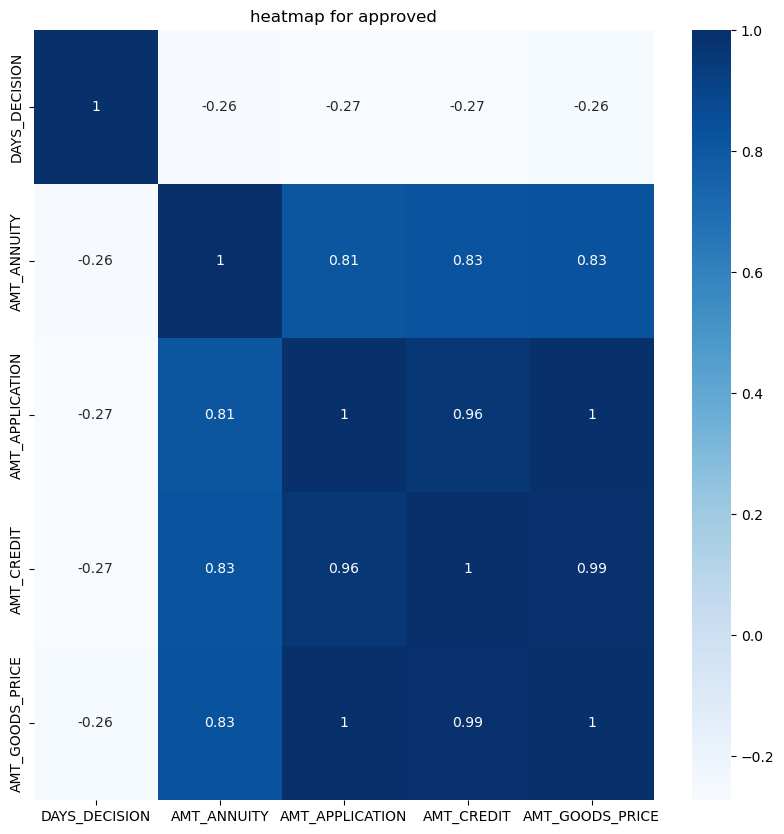

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_approved.corr(),annot=True,cmap='Blues')
plt.title("heatmap for approved")
plt.show()

ABOVE CONCLUSION->



1)AMT_APPLICATION AS HIGH CORRELATION ALONG WITH AMT_CREDIT AND AMT_GOODS_PRICE,AMT_ANNUNITY



2)DAYS_DECISION  HAS NEGATIVE CORRELATION ALONG WITH AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

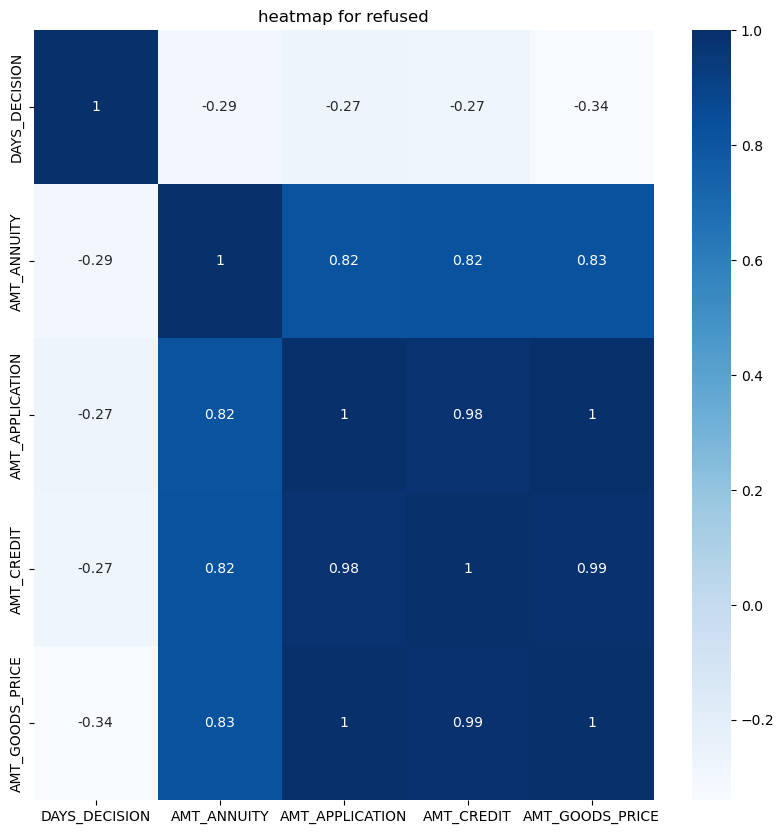

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_refused.corr(),annot=True,cmap='Blues')
plt.title("heatmap for refused")
plt.show()

ABOVE CONCLUSION->



1)AMT_APPLICATION AS HIGH CORRELATION ALONG WITH AMT_CREDIT AND AMT_GOODS_PRICE,AMT_ANNUNITY



2)DAYS_DECISION  HAS NEGATIVE CORRELATION ALONG WITH AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

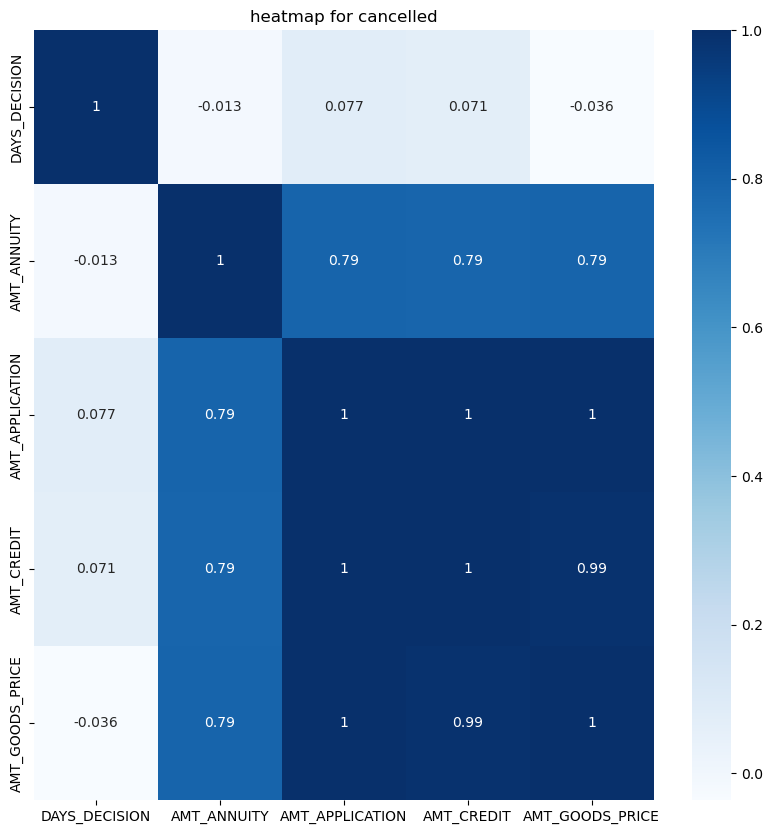

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_cancelled.corr(),annot=True,cmap='Blues')
plt.title("heatmap for cancelled")
plt.show()

ABOVE CONCLUSION->



1)AMT_APPLICATION AS HIGH CORRELATION ALONG WITH AMT_CREDIT AND AMT_GOODS_PRICE,AMT_ANNUNITY



2)DAYS_DECISION  HAS NEGATIVE CORRELATION ALONG WITH AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

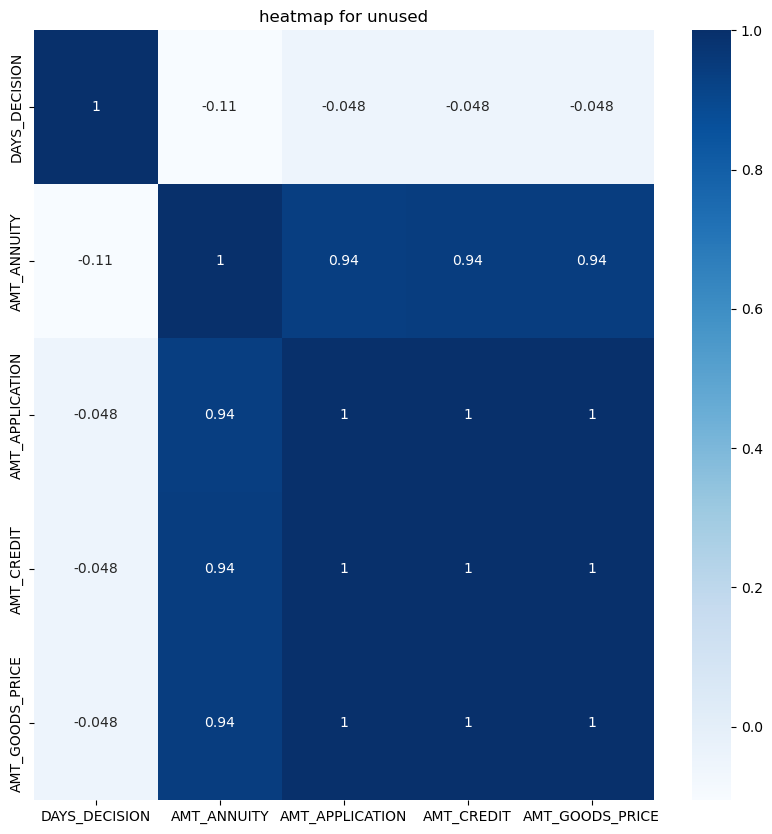

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(corr_unused.corr(),annot=True,cmap='Blues')
plt.title("heatmap for unused")
plt.show()

ABOVE CONCLUSION->



1)AMT_APPLICATION AS HIGH CORRELATION ALONG WITH AMT_CREDIT AND AMT_GOODS_PRICE,AMT_ANNUNITY



2)DAYS_DECISION  HAS NEGATIVE CORRELATION ALONG WITH AMT_GOODS_PRICE,AMT_CREDIT,AMT_APPLICATION,CNT_PAYMENT,AMT_ANNUITY

MERGEING THE PREVIOUS AND PRESENT APPLICATION IN DATA FRAME->>

In [ ]:
merge_df=app_df.merge(p_df,on=["SK_ID_CURR"],how='left')
merge_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0        24700.5           351000.0   Unaccompanied          Working   
1        35698.5          1129500.0          Family    State servant   
2        35698.5          1129500.0          Family    State servant   
3        35698.5          1129500.0          Family    State servant   
4         6750.0           135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0  

In [ ]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430155 entries, 0 to 1430154
Columns: 114 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(4), float64(37), int64(46), object(27)
memory usage: 1.2+ GB


In [ ]:
for col in merge_df.columns:
    if col.startswith('FLAG'):
        merge_df.drop(columns=col,axis=1,inplace=True)

In [ ]:
merge_df.shape

(1430155, 85)

In [ ]:
res1=pd.pivot_table(data=merge_df,index=['NAME_INCOME_TYPE','NAME_CLIENT_TYPE'],columns=['NAME_CONTRACT_STATUS'],values="TARGET",aggfunc='mean',fill_value=0)
res1

NAME_CONTRACT_STATUS                   Approved  Canceled   Refused  \
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                                 
Commercial associate New               0.083012  0.151452  0.096548   
                     Refreshed         0.059167  0.074328  0.105068   
                     Repeater          0.068442  0.084824  0.112279   
                     XNA               0.090909  0.084337  0.062500   
Maternity leave      New               1.000000  0.000000  0.000000   
                     Repeater          1.000000  1.000000  1.000000   
Pensioner            New               0.057211  0.112805  0.060098   
                     Refreshed         0.046378  0.058281  0.089165   
                     Repeater          0.051421  0.060693  0.078492   
                     XNA               0.010101  0.047872  0.116279   
State servant        New               0.061750  0.090226  0.047745   
                     Refreshed         0.044057  0.045317  0.083756   
                     Repeater          0.056430  0.072019  0.088759   
                     XNA               0.062500  0.023256  0.000000   
Student              New               0.000000  0.000000  0.000000   
                     Refreshed         0.000000  0.000000  0.000000   
                     Repeater          0.000000  0.000000  0.000000   
Unemployed           New               0.500000  0.000000  0.500000   
                     Refreshed         0.000000  0.000000  0.000000   
                     Repeater          0.460000  0.687500  0.666667   
Working              New               0.104073  0.153177  0.135940   
                     Refreshed         0.077033  0.098898  0.134548   
                     Repeater          0.084077  0.111727  0.143000   
                     XNA               0.092593  0.141791  0.185897   

NAME_CONTRACT_STATUS                   Unused offer  
NAME_INCOME_TYPE     NAME_CLIENT_TYPE                
Commercial associate New                   0.070485  
                     Refreshed             0.052774  
                     Repeater              0.068921  
                     XNA                   0.200000  
Maternity leave      New                   0.000000  
                     Repeater              1.000000  
Pensioner            New                   0.062857  
                     Refreshed             0.044521  
                     Repeater              0.053645  
                     XNA                   0.000000  
State servant        New                   0.080357  
                     Refreshed             0.081967  
                     Repeater              0.067183  
                     XNA                   0.000000  
Student              New                   0.000000  
                     Refreshed             0.000000  
                     Repeater              0.000000  
Unemployed           New                   0.000000  
                     Refreshed             0.000000  
                     Repeater              0.000000  
Working              New                   0.102131  
                     Refreshed             0.085016  
                     Repeater              0.093989  
                     XNA                   0.100000

<Figure size 1000x1000 with 0 Axes>

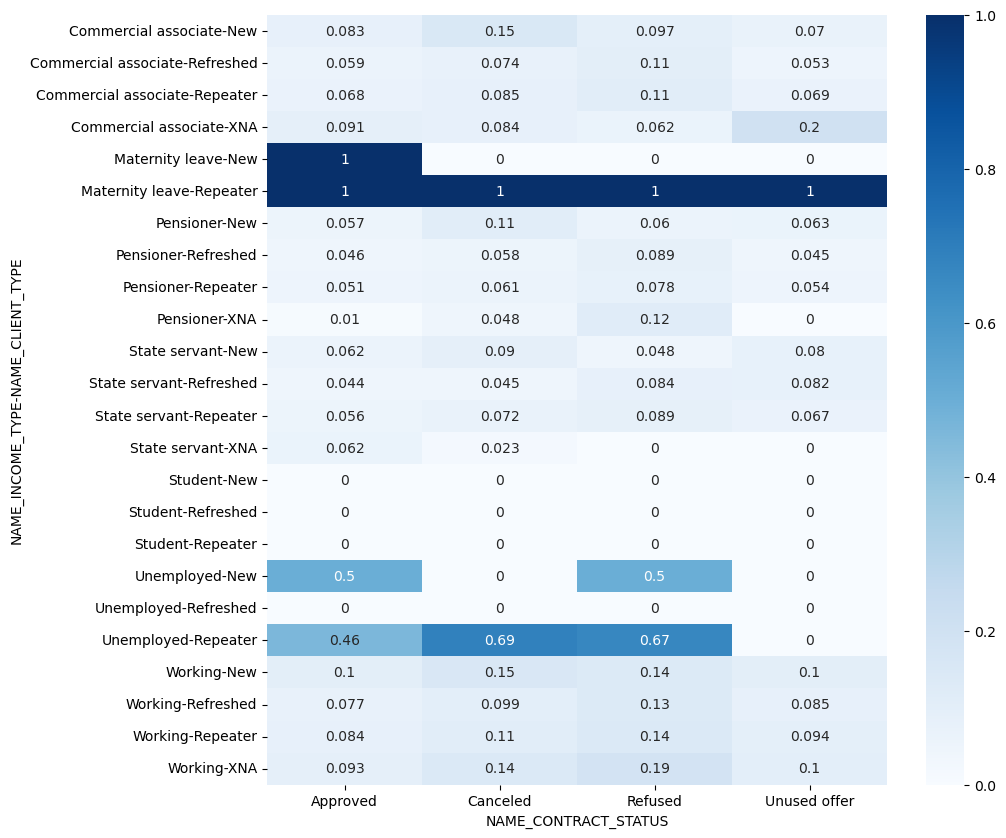

In [ ]:
plt.figure(figsize=[10,10])
sns.heatmap(res1,annot=True,cmap='Blues')
plt.show()


ABOVE CONCLUSTION

Applicants on Maternity leave with a New client type have a higher likelihood of loan approval.

Applicants who are on Maternity leave or Unemployed with a Repeater client type tend to have their loans cancelled.

Applicants who are on Maternity leave or Unemployed with a Repeater client type are more likely to have their loans refused.

Applicants on Maternity leave with a Repeater client type, as well as Working applicants with a New client type, are less likely to utilize the bank’s offer.

In [ ]:
res2=pd.pivot_table(data=merge_df,index=['CODE_GENDER','NAME_SELLER_INDUSTRY'],columns=['TARGET'],values='AMT_GOODS_PRICE_x',aggfunc='sum')

In [ ]:
res2

TARGET                                       0             1
CODE_GENDER NAME_SELLER_INDUSTRY                            
F           Auto technology       6.111273e+08  5.364450e+07
            Clothing              9.403640e+09  4.968903e+08
            Connectivity          7.070942e+10  5.910960e+09
            Construction          8.794223e+09  5.130180e+08
            Consumer electronics  1.086232e+11  7.170236e+09
            Furniture             1.987179e+10  1.034667e+09
            Industry              5.634099e+09  3.440790e+08
            Jewelry               6.349129e+08  4.627532e+07
            MLM partners          3.501245e+08  2.293200e+07
            Tourism               1.711690e+08  5.674500e+06
            XNA                   2.409409e+11  2.068024e+10
M           Auto technology       1.142561e+09  1.286955e+08
            Clothing              1.418759e+09  1.160505e+08
            Connectivity          4.010272e+10  4.572106e+09
            Construction          3.882024e+09  3.197192e+08
            Consumer electronics  6.305746e+10  5.757388e+09
            Furniture             5.886620e+09  4.915566e+08
            Industry              2.905955e+09  2.527595e+08
            Jewelry               2.021443e+08  2.709533e+07
            MLM partners          6.380550e+07  6.390000e+06
            Tourism               4.858650e+07  3.640500e+06
            XNA                   1.014658e+11  1.203918e+10
XNA         Connectivity          2.700000e+06           NaN
            Consumer electronics  3.262500e+06           NaN
            Furniture             1.350000e+06           NaN
            XNA                   2.092500e+07           NaN

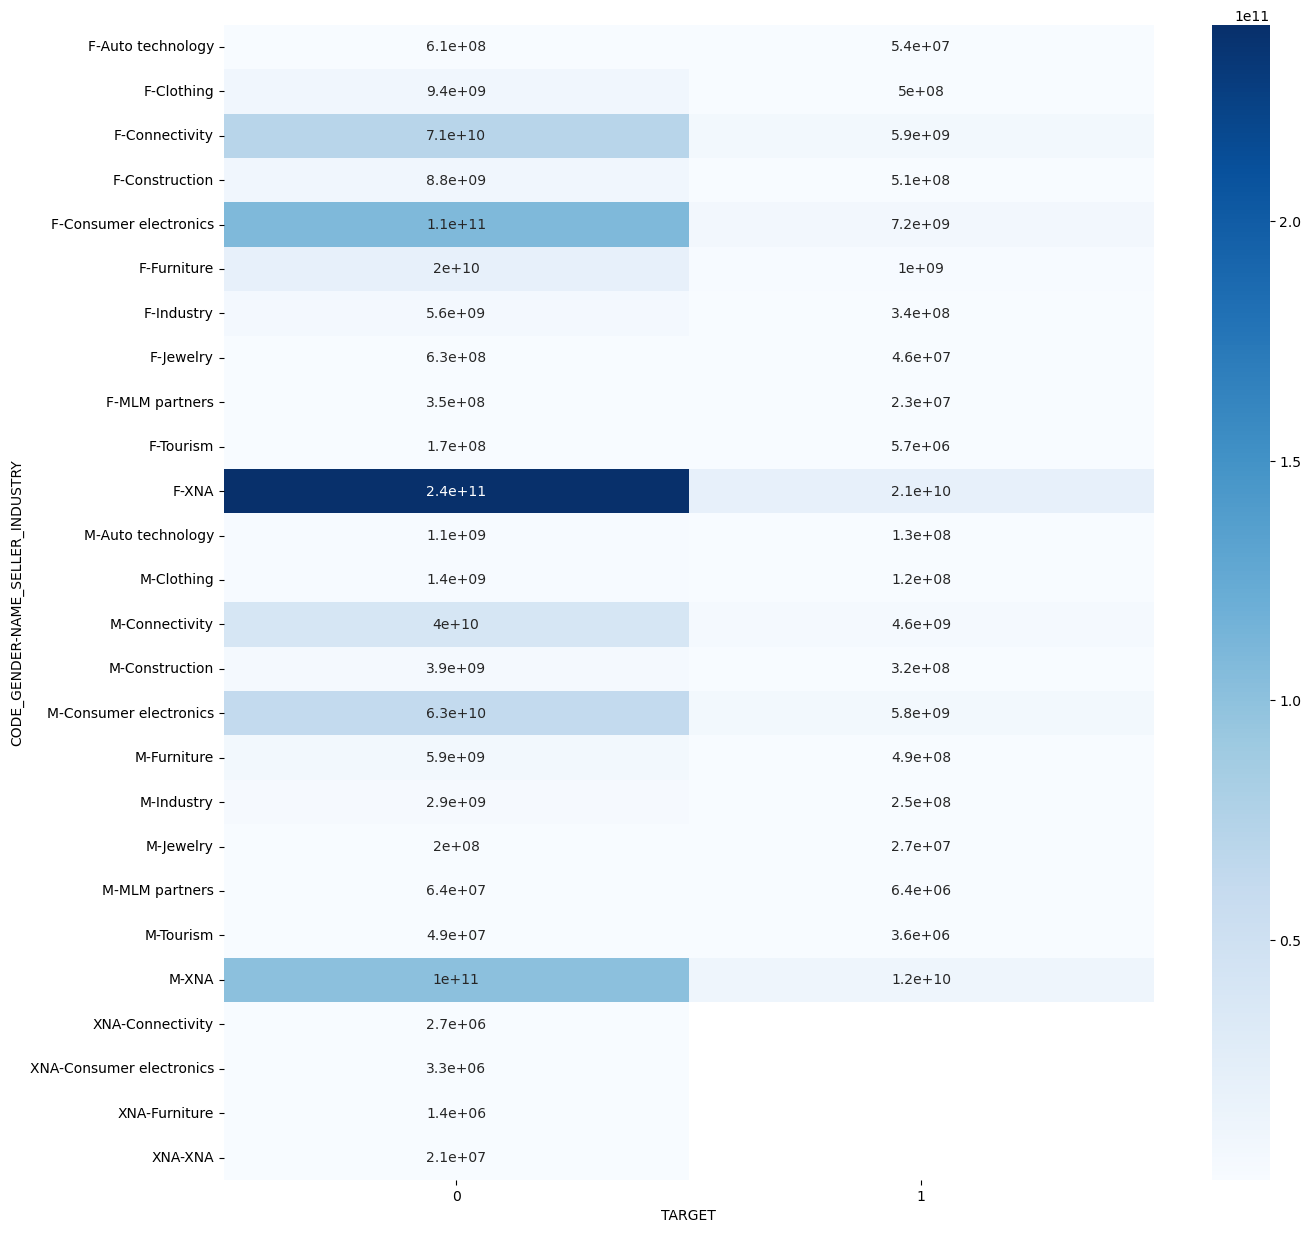

In [ ]:
plt.figure(figsize=[15,15])
sns.heatmap(res2,annot=True,cmap='Blues')
plt.show()


FINAL CONCLUSTION

Loan & Industry Trends

Most of the loan amount concentration is in Consumer Electronics, Connectivity, and FXNA industries.

Very small contributions come from Tourism, Jewelry, and MLM partners.

This means customers mainly take loans for electronics & connectivity, while tourism/jewelry loans are rare.



2. Loan Type & Status

Cash loans (45%) and Consumer loans (44%) are the main products.

Only 12% are Revolving loans.

62% of applications are approved, while ~19% get cancelled, 17% refused, and 2% unused.

So, approval is common, but a significant number still get cancelled/refused.





3. Client Type & Income

74% are repeat clients → shows customer loyalty.

Insights from merged analysis:

New clients on maternity leave → more approvals.

Unemployed or maternity leave repeaters → higher chances of cancellation/refusal.

Working new clients → often less likely to use offers.







4. Loan Value Relationships

AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY are strongly correlated → bigger requested amount means bigger credit & annuity.

DAYS_DECISION is negatively correlated → faster decision = higher loan values.




5. Outliers & Distribution

Many numeric fields have extreme outliers, pulling the mean far away from the median.

Data is skewed → preprocessing is required (log transformation, scaling, or capping).


6. Weekly Approval Behavior

Approved loans peak on Monday & Wednesday, lowest on Sunday.

Cancelled loans peak on Sunday.

Refused loans also higher on Monday/Wednesday.

Unused offers stay flat across weekdays.



7. Risky Industries (with Target)

Loan defaults (TARGET = 1) are mostly seen in Consumer Electronics & Clothing sectors.

These industries bring higher risk exposure, while FXNA and Connectivity are more stable.